In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [60]:
pd.set_option('display.max_columns',None)

# 1.Data import

In [61]:
telecom = pd.read_csv('telecom_churn_data.csv')

In [62]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [63]:
telecom.shape

(99999, 226)

In [64]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


# 2.Data Preparation

## 2.1 Duplicate check

In [65]:
telecom['mobile_number'].duplicated().sum()

0

No duplicates

In [66]:
telecom.set_index('mobile_number',inplace = True)

## 2.2 Derivied columns

### Total rech columns

In [67]:
rech_cols = []
for x in telecom.columns.tolist():
    if (('rech' in x) or ('amt' in x) or ('arpu' in x)) and (('date' not in x) and ('day' not in x)):
        rech_cols.append(x)

In [68]:
telecom[rech_cols].head()

,arpu_6,arpu_7,arpu_8,arpu_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,4,3,2,6,362,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN
7001865778,34.047,355.074,268.321,86.285,4,9,11,5,74,384,283,121,44,154,65,50,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN
7001625959,167.690,189.058,210.226,290.714,5,4,2,7,168,315,116,358,86,200,86,100,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0
7001204172,221.338,251.102,508.054,389.500,10,11,18,14,230,310,601,410,60,50,50,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7000142493,261.636,309.876,238.174,163.426,5,6,3,4,196,350,287,200,56,110,110,50,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN


In [69]:
telecom[rech_cols].describe()

,arpu_6,arpu_7,arpu_8,arpu_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,282.987358,278.536648,279.154731,261.645069,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026
std,328.439770,338.156291,344.474791,341.998630,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224
min,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
25%,93.411500,86.980500,84.126000,62.685000,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,197.704000,191.640000,192.080000,176.849000,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000
75%,371.060000,365.344500,369.370500,353.466500,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000
max,27731.088000,35145.834000,33543.624000,38805.617000,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45

In [70]:
telecom[['total_rech_num_6','total_rech_amt_6','total_rech_data_6','av_rech_amt_data_6']].head()

,total_rech_num_6,total_rech_amt_6,total_rech_data_6,av_rech_amt_data_6
mobile_number,,,,
7000842753,4,362,1.0,252.0
7001865778,4,74,NaN,NaN
7001625959,5,168,NaN,NaN
7001204172,10,230,NaN,NaN
7000142493,5,196,1.0,56.0


In [71]:
copy = telecom.copy()

In [72]:
copy[rech_cols].isnull().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
arpu_9                    0
total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
max_rech_amt_9            0
total_rech_data_6     74846
total_rech_data_7     74428
total_rech_data_8     73660
total_rech_data_9     74077
max_rech_data_6       74846
max_rech_data_7       74428
max_rech_data_8       73660
max_rech_data_9       74077
count_rech_2g_6       74846
count_rech_2g_7       74428
count_rech_2g_8       73660
count_rech_2g_9       74077
count_rech_3g_6       74846
count_rech_3g_7       74428
count_rech_3g_8       73660
count_rech_3g_9       74077
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9  

from the describe we can see that it is safe to assume to replace null with 0 for all the rech_amt,rech_count and max columns

In [73]:
copy[rech_cols] = copy[rech_cols].replace(np.nan,0)

In [74]:
telecom['total_amt_6'] = copy['total_rech_amt_6']+copy['total_rech_data_6']*copy['av_rech_amt_data_6']
telecom['total_amt_7'] = copy['total_rech_amt_7']+copy['total_rech_data_7']*copy['av_rech_amt_data_7']
telecom['total_amt_8'] = copy['total_rech_amt_8']+copy['total_rech_data_8']*copy['av_rech_amt_data_8']
telecom['total_amt_9'] = copy['total_rech_amt_9']+copy['total_rech_data_9']*copy['av_rech_amt_data_9']

In [75]:
telecom['total_amt_6_7'] =telecom['total_amt_6']+telecom['total_amt_7']
telecom['total_amt_8_9'] =telecom['total_amt_8']+telecom['total_amt_9']
telecom['total_amt_6_9'] = telecom['total_amt_6']+telecom['total_amt_7'] +telecom['total_amt_8']+telecom['total_amt_9'] 

### Av amount

In [76]:
telecom['total_rech_count_6'] = copy['av_rech_amt_data_6']+copy['total_rech_num_6']
telecom['total_rech_count_7'] = copy['av_rech_amt_data_7']+copy['total_rech_num_7']
telecom['total_rech_count_8'] = copy['av_rech_amt_data_8']+copy['total_rech_num_8']
telecom['total_rech_count_9'] = copy['av_rech_amt_data_9']+copy['total_rech_num_9']

In [77]:
telecom['av_amt_6_7'] = telecom['total_amt_6_7']/(telecom['total_rech_count_6']+telecom['total_rech_count_7'])

In [78]:
telecom['av_amt_6_7'].isnull().sum()

185

In [79]:
telecom[telecom['av_amt_6_7'].isnull()][['av_amt_6_7','total_rech_count_6','total_rech_count_7','total_amt_6_7']].head()

,av_amt_6_7,total_rech_count_6,total_rech_count_7,total_amt_6_7
mobile_number,,,,
7000621478,NaN,0.0,0.0,0.0
7002323802,NaN,0.0,0.0,0.0
7000544026,NaN,0.0,0.0,0.0
7000428808,NaN,0.0,0.0,0.0
7002380920,NaN,0.0,0.0,0.0


In [80]:
# all the rows where the average amount is nan, the total recharges are 0.Therefore replacing null with 0
telecom['av_amt_6_7'] = telecom['av_amt_6_7'].replace(np.nan,0) 

In [81]:
telecom['av_amt_6_7'].isnull().sum()

0

## 2.3 High value customers

Those customers who have spend an average amount more than the 70 percentile of average amount in the first two months are considered as HVCs.

In [82]:
telecom_hvc = telecom[telecom['av_amt_6_7']>telecom['av_amt_6_7'].quantile(0.7)]

In [83]:
telecom_hvc.shape

(29993, 237)

## 2.4 Tagging customers

Those customers who have not made any calls or received any calls and not have used any form of mobile data are considered as churned customers

### null value check for those 4 columns

In [84]:
telecom_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [85]:
telecom_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
mobile_number,,,,
7001625959,517.74,124.94,0.0,8.42
7000701601,0.00,0.00,0.0,0.00
7002006969,146.03,0.01,0.0,0.00
7001419799,79.91,77.31,0.0,0.00
7002191713,631.86,446.09,0.0,0.00


taking the maximum among the 4 columns and equating it to 0 to identify the churn customers. Single the max value for such customers will be 0

In [86]:
churn_indices = telecom_hvc[telecom_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].max(axis =1) == 0].index

In [87]:
print(len(churn_indices))

3056


In [88]:
telecom_hvc.loc[churn_indices,['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
mobile_number,,,,
7000701601,0.0,0.0,0.0,0.0
7002108620,0.0,0.0,0.0,0.0
7000816313,0.0,0.0,0.0,0.0
7002311591,0.0,0.0,0.0,0.0
7001788209,0.0,0.0,0.0,0.0


In [89]:
telecom_hvc['churn'] = 0

In [90]:
telecom_hvc.loc[churn_indices,'churn'] = 1

In [91]:
telecom_hvc['churn'].value_counts()

0    26937
1     3056
Name: churn, dtype: int64

## 2.5 Data cleaning

### Dropping all columns corresponding to churn phase

In [92]:
churn_phase_cols = []
for x in telecom_hvc.columns.tolist():
    if '_9' in x:
        churn_phase_cols.append(x)

In [93]:
print(churn_phase_cols)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_amt_9', 'total_am

In [94]:
print(len(churn_phase_cols))

58


In [95]:
telecom_hvc_1 =  telecom_hvc.drop(churn_phase_cols,axis = 1)

In [96]:
print(telecom_hvc.shape[1]-telecom_hvc_1.shape[1])

58


In [97]:
telecom_hvc_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 180 entries, circle_id to churn
dtypes: float64(144), int64(27), object(9)
memory usage: 42.7+ MB


In [98]:
telecom_hvc_1.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_6,total_amt_7,total_amt_8,total_amt_6_7,total_rech_count_6,total_rech_count_7,total_rech_count_8,av_amt_6_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,0.00,0.00,0.00,0.00,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.0,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,0.0,0.0,0.0,47.64,108.68,120.94,0.0,0.00,0.00,46.56,236.84,96.84,0.45,0.0,0.0,155.33,412.94,285.46,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,0.0,0.0,0.0,139.33,306.66,239.03,370.04,519.53,395.03,0.21,0.00,0.0,0.00,0.85,0.00,0.93,3.14,0.00,5,4,2,168,315,116,86,200,86,6/17/2014,7/24/2014,8/14/2014,0,200,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1103,0.00,0.00,4.17,0.0,168.0,315.0,116.0,483.0,5.0,4.0,2.0,53.666667,0
7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,5

### Null value check

In [99]:
null_columns = (telecom_hvc_1.isnull().sum()/len(telecom_hvc_1))[telecom_hvc_1.isnull().sum()/len(telecom_hvc_1) > 0]

In [100]:
print(len(null_columns))

125


In [101]:
# converting into percentage
null_columns = null_columns*100

In [102]:
null_columns.sort_values(ascending = False)

fb_user_7                   99.449872
night_pck_user_7            99.449872
count_rech_2g_7             99.449872
total_rech_data_7           99.449872
arpu_2g_7                   99.449872
date_of_last_rech_data_7    99.449872
arpu_3g_7                   99.449872
max_rech_data_7             99.449872
count_rech_3g_7             99.449872
av_rech_amt_data_7          99.449872
arpu_3g_6                   99.436535
total_rech_data_6           99.436535
count_rech_2g_6             99.436535
count_rech_3g_6             99.436535
max_rech_data_6             99.436535
av_rech_amt_data_6          99.436535
arpu_2g_6                   99.436535
date_of_last_rech_data_6    99.436535
night_pck_user_6            99.436535
fb_user_6                   99.436535
date_of_last_rech_data_8    91.544694
fb_user_8                   91.544694
total_rech_data_8           91.544694
max_rech_data_8             91.544694
night_pck_user_8            91.544694
count_rech_2g_8             91.544694
count_rech_3

In [103]:
null_columns[null_columns>20]

date_of_last_rech_data_6    99.436535
date_of_last_rech_data_7    99.449872
date_of_last_rech_data_8    91.544694
total_rech_data_6           99.436535
total_rech_data_7           99.449872
total_rech_data_8           91.544694
max_rech_data_6             99.436535
max_rech_data_7             99.449872
max_rech_data_8             91.544694
count_rech_2g_6             99.436535
count_rech_2g_7             99.449872
count_rech_2g_8             91.544694
count_rech_3g_6             99.436535
count_rech_3g_7             99.449872
count_rech_3g_8             91.544694
av_rech_amt_data_6          99.436535
av_rech_amt_data_7          99.449872
av_rech_amt_data_8          91.544694
arpu_3g_6                   99.436535
arpu_3g_7                   99.449872
arpu_3g_8                   91.544694
arpu_2g_6                   99.436535
arpu_2g_7                   99.449872
arpu_2g_8                   91.544694
night_pck_user_6            99.436535
night_pck_user_7            99.449872
night_pck_us

Dropping all the columns which have null value percentage more than 20%. But it can be seen that all such columns have more then 90%,hence it is safe to assume

In [104]:
print(len(null_columns[null_columns>20]))

30


In [105]:
telecom_hvc_2 = telecom_hvc_1.drop(null_columns[null_columns>20].index.tolist(),axis = 1)

In [106]:
print(telecom_hvc_1.shape[1]-telecom_hvc_2.shape[1])

30


In [107]:
telecom_hvc_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 150 entries, circle_id to churn
dtypes: float64(117), int64(27), object(6)
memory usage: 35.8+ MB


In [108]:
null_columns.drop(null_columns[null_columns>20].index.tolist(),inplace = True)

In [109]:
print(null_columns.sort_values(ascending = False))

date_of_last_rech_8     5.121195
loc_og_t2m_mou_8        4.384356
isd_og_mou_8            4.384356
std_ic_t2t_mou_8        4.384356
loc_og_t2c_mou_8        4.384356
loc_ic_mou_8            4.384356
loc_og_mou_8            4.384356
loc_ic_t2f_mou_8        4.384356
std_og_t2t_mou_8        4.384356
loc_ic_t2m_mou_8        4.384356
std_og_t2m_mou_8        4.384356
loc_ic_t2t_mou_8        4.384356
std_og_t2f_mou_8        4.384356
og_others_8             4.384356
std_og_t2c_mou_8        4.384356
spl_og_mou_8            4.384356
std_og_mou_8            4.384356
std_ic_t2m_mou_8        4.384356
loc_og_t2f_mou_8        4.384356
std_ic_t2f_mou_8        4.384356
roam_ic_mou_8           4.384356
ic_others_8             4.384356
loc_og_t2t_mou_8        4.384356
onnet_mou_8             4.384356
std_ic_t2o_mou_8        4.384356
isd_ic_mou_8            4.384356
offnet_mou_8            4.384356
roam_og_mou_8           4.384356
std_ic_mou_8            4.384356
spl_ic_mou_8            4.384356
          

all the columns have less than 6% of null values.Lets check if there any rows which contain large number of null values

In [110]:
null_values_rows = telecom_hvc_2.isnull().sum(axis = 1)

In [111]:
null_values_rows[null_values_rows > 0].value_counts()

1     1338
29     760
30     189
94     173
31     127
59     126
58     110
2       84
62      73
93      51
32      29
90      28
60      24
91      17
61       9
87       9
92       8
dtype: int64

In [112]:
telecom_hvc_2.loc[null_values_rows[null_values_rows > 0].index,'churn'].value_counts()

0    1784
1    1371
Name: churn, dtype: int64

__There rows with null values have about 30% of total churn customers. Therefore dropping these rows will result in significant loss of churn data.Therefore we have to impute these values instead of dropping__

### Imputing Null values in the rows

In [113]:
telecom_hvc_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 150 entries, circle_id to churn
dtypes: float64(117), int64(27), object(6)
memory usage: 35.8+ MB


In [114]:
telecom_hvc_2.select_dtypes(include = 'object').columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')

In [115]:
# all are date columns hence converting them into datetime
for column in telecom_hvc_2.select_dtypes(include = 'object').columns:
    telecom_hvc_2[column] = telecom_hvc_2[column].astype('datetime64[ns]')

In [116]:
telecom_hvc_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 150 entries, circle_id to churn
dtypes: datetime64[ns](6), float64(117), int64(27)
memory usage: 35.8 MB


In [117]:
telecom_hvc_2[null_columns.index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Data columns (total 95 columns):
loc_og_t2o_mou          29716 non-null float64
std_og_t2o_mou          29716 non-null float64
loc_ic_t2o_mou          29716 non-null float64
last_date_of_month_7    29746 non-null datetime64[ns]
last_date_of_month_8    29537 non-null datetime64[ns]
onnet_mou_6             29317 non-null float64
onnet_mou_7             29337 non-null float64
onnet_mou_8             28678 non-null float64
offnet_mou_6            29317 non-null float64
offnet_mou_7            29337 non-null float64
offnet_mou_8            28678 non-null float64
roam_ic_mou_6           29317 non-null float64
roam_ic_mou_7           29337 non-null float64
roam_ic_mou_8           28678 non-null float64
roam_og_mou_6           29317 non-null float64
roam_og_mou_7           29337 non-null float64
roam_og_mou_8           28678 non-null float64
loc_og_t2t_mou_6        29317 non-null float64
loc_og_t2t_mou_7 

In [118]:
print(telecom_hvc_2['last_date_of_month_6'].value_counts())
print('*'*40)
print(telecom_hvc_2['last_date_of_month_7'].value_counts())
print('*'*40)
print(telecom_hvc_2['last_date_of_month_8'].value_counts())

2014-06-30    29993
Name: last_date_of_month_6, dtype: int64
****************************************
2014-07-31    29746
Name: last_date_of_month_7, dtype: int64
****************************************
2014-08-31    29537
Name: last_date_of_month_8, dtype: int64


In [119]:
# Dropping last date columns as they only signify the last date of month.
telecom_hvc_3 = telecom_hvc_2.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis = 1)

In [120]:
print(telecom_hvc_2.shape[1]-telecom_hvc_3.shape[1])

3


In [121]:
# Date_of_last_rech columns
# creating new columns called is_rech for each month which shows if a customer has recharged in the particular month or not.
telecom_hvc_3['is_rech_6'] = 1
telecom_hvc_3['is_rech_7'] = 1
telecom_hvc_3['is_rech_8'] = 1

telecom_hvc_3.loc[telecom_hvc_3['date_of_last_rech_6'].isnull(),'is_rech_6'] = 0
telecom_hvc_3.loc[telecom_hvc_3['date_of_last_rech_7'].isnull(),'is_rech_7'] = 0
telecom_hvc_3.loc[telecom_hvc_3['date_of_last_rech_8'].isnull(),'is_rech_8'] = 0

In [122]:
# Dropping  Date_of_last_rech columns as they only signify the last date of month.
telecom_hvc_4 = telecom_hvc_3.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis = 1)

In [123]:
print(telecom_hvc_3.shape[1]-telecom_hvc_4.shape[1])

3


In [124]:
null_columns.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_7','last_date_of_month_8'],inplace = True)

In [125]:
telecom_hvc_4[null_columns.index].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,29716.0,29716.0,29716.0,29317.000000,29337.000000,28678.000000,29317.00000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.0,29337.0,28678.0,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.00000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.0,29337.0,28678.0,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000,29317.000000,29337.000000,28678.000000
mean,0.0,0.0,0.0,210.471993,210.667087,196.355634,304.79712,302.418284,282.400454,13.909410,10.284328,9.494816,22.994618,16.761343,15.895981,64.126795,63.985360,62.032648,135.382774,133.061343,129.480588,6.030576,6.085190,5.776903,0.893829,1.054647,1.181999,205.548705,203.140433,197.298380,137.248714,139.942729,128.077862,143.216309,147.016452,131.435775,1.995048,2.014394,1.841752,0.0,0.0,0.0,282.463784,288.977225,261.358799,1.736021,1.597824,1.471639,3.297772,4.08367,4.196622,0.351848,0.048218,0.052569,52.456997,52.585703,50.605439,123.074757,122.369924,122.015837,14.115995,14.688246,13.426487,189.657137,189.653350,186.057165,11.415415,11.837010,11.354348,24.424651,25.618972,24.317721,2.968388,3.003703,2.763201,0.0,0.0,0.0,38.811719,40.462905,38.438432,0.061513,0.018225,0.028492,9.627736,10.445344,10.251275,1.094347,1.146745,1.069567
std,0.0,0.0,0.0,384.149200,392.685939,386.358523,404.54970,420.602921,415.643618,70.319316,61.520516,55.750286,99.206212,82.318615,91.558277,158.418696,164.602004,167.374643,197.183537,192.310677,192.565745,20.602499,20.595282,18.599333,4.788010,5.885213,5.903064,289.884161,285.849318,288.960667,351.730318,358.062423,346.075702,347.750981,366.256461,357.216068,11.602315,12.565711,11.072221,0.0,0.0,0.0,527.257595,547.003545,531.958325,45.421887,44.472044,44.237759,14.086180,18.02520,16.229909,4.928865,2.873912,3.601830,123.414334,127.939660,110.957438,170.706502,161.914812,166.042187,42.315331,45.056993,42.579684,246.073633,240.698779,234.987220,60.657499,60.9944

In [126]:
# Replacing all null values with 0
telecom_hvc_5 = telecom_hvc_4.replace(np.nan,0)

In [127]:
print(telecom_hvc_5.isnull().sum().sum())

0


In [128]:
telecom_hvc_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 147 entries, circle_id to is_rech_8
dtypes: float64(117), int64(30)
memory usage: 35.1 MB


### Dropping columns with single value in the entire column

In [129]:
#creating a dictionary with column and number of unique values
unique_value_dict = {}
for x in telecom_hvc_5.columns.tolist():
    l = len(telecom_hvc_5[x].value_counts())
    unique_value_dict[x] = l

In [130]:
unique_df = pd.DataFrame.from_dict(unique_value_dict,orient = 'index')

In [131]:
unique_df[unique_df[0] == 1].index

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'monthly_2g_6', 'monthly_3g_7'],
      dtype='object')

In [132]:
# Dropping all the columns with only one unique value
telecom_hvc_6 = telecom_hvc_5.drop(unique_df[unique_df[0] == 1].index,axis = 1)

In [133]:
telecom_hvc_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 135 entries, arpu_6 to is_rech_8
dtypes: float64(108), int64(27)
memory usage: 32.4 MB


### Dropping columns with high percentage of single value

In [134]:
#creating a dictionary with column and number of unique values
high_value_dict = {}
for x in telecom_hvc_6.columns.tolist():
    l = round(100*(telecom_hvc_6[x].value_counts().iloc[0]/len(telecom_hvc_6)))
    high_value_dict[x] = l

In [135]:
high_df = pd.DataFrame.from_dict(high_value_dict,orient = 'index')

In [136]:
high_df.sort_values(by = 0,ascending = False).head(15)

,0
vol_3g_mb_7,100.0
vol_3g_mb_6,100.0
monthly_3g_6,100.0
og_others_8,100.0
sachet_3g_6,100.0
sachet_3g_7,100.0
og_others_7,100.0
vol_2g_mb_6,100.0
vol_2g_mb_7,100.0
monthly_2g_7,100.0


In [137]:
# Dropping all the columns with high percentage of single value
telecom_hvc_6 = telecom_hvc_6.drop(high_df[high_df[0] >= 99].index,axis = 1)

In [138]:
telecom_hvc_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 121 entries, arpu_6 to is_rech_8
dtypes: float64(102), int64(19)
memory usage: 29.2 MB


### Converting month name columns

In [139]:
telecom_hvc_6.rename(columns = {'aug_vbc_3g':'vbc_3g_8','jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','sep_vbc_3g':'vbc_3g_9'},inplace = True)

In [140]:
telecom_hvc_6.drop('vbc_3g_9',axis =1,inplace = True)

In [141]:
telecom_hvc_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 120 entries, arpu_6 to is_rech_8
dtypes: float64(101), int64(19)
memory usage: 27.7 MB


# 3. Data exploration  and EDA

## Churn

In [142]:
print(telecom_hvc_6.churn.value_counts())
print('*'*40)
print(100*telecom_hvc_6.churn.value_counts()/len(telecom_hvc_6))

0    26937
1     3056
Name: churn, dtype: int64
****************************************
0    89.810956
1    10.189044
Name: churn, dtype: float64


Only 10% of the high value customers are churn customers

## Recharge amount

### Total_amt including data recharge

In [143]:
telecom_hvc_6[['total_amt_6','total_amt_7','total_amt_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,total_amt_6,total_amt_7,total_amt_8
count,29993.000000,29993.000000,29993.000000
mean,440.375404,425.982779,416.890591
std,596.637440,656.757608,734.261762
min,0.000000,0.000000,0.000000
25%,200.000000,171.000000,130.000000
50%,330.000000,320.000000,296.000000
75%,550.000000,536.000000,548.000000
90%,872.000000,862.000000,887.000000
95%,1130.000000,1126.400000,1170.000000
99%,1961.320000,1968.640000,2074.480000


In [144]:
telecom_hvc_6[['total_amt_6','total_amt_7','total_amt_8','churn']].median()

total_amt_6    330.0
total_amt_7    320.0
total_amt_8    296.0
churn            0.0
dtype: float64

Similar to the total rech amount, slight down trend but not too steep of a decline

### total_amt vs churn

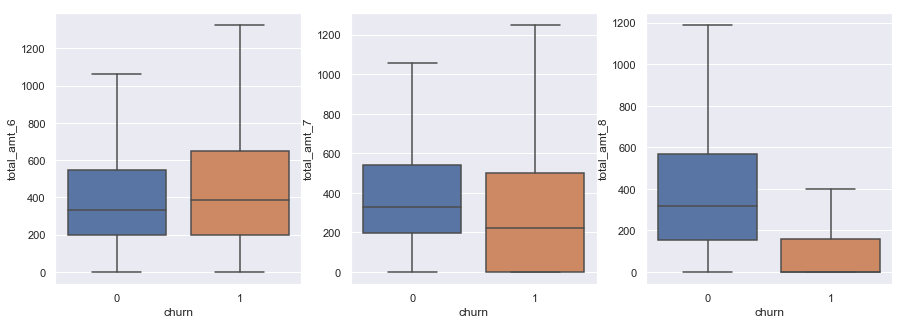

In [145]:
plt.figure(figsize = (15,5))
i = 1
for col in ['total_amt_6','total_amt_7','total_amt_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_6,showfliers = False)
    i = i+1
plt.show()

In [146]:
telecom_hvc_6[['total_amt_6','total_amt_7','total_amt_8','churn']].groupby('churn').median()

,total_amt_6,total_amt_7,total_amt_8
churn,,,
0,330.0,330.0,318.0
1,383.5,220.0,0.0


Similar trend for the total rech amount as well

## Derived column: difference from consecutive months

In [147]:
telecom_hvc_6['diff_amt_6_7'] = telecom_hvc_6['total_amt_6'] - telecom_hvc_6['total_amt_7']
telecom_hvc_6['diff_amt_7_8'] = telecom_hvc_6['total_amt_7'] - telecom_hvc_6['total_amt_8']
telecom_hvc_6['diff_amt_6_8'] = telecom_hvc_6['total_amt_6'] - telecom_hvc_6['total_amt_8']

In [148]:
telecom_hvc_6[['diff_amt_6_7','diff_amt_7_8','diff_amt_6_8','churn']].groupby('churn').mean()

,diff_amt_6_7,diff_amt_7_8,diff_amt_6_8
churn,,,
0,-1.602703,-12.713517,-14.316219
1,155.382853,201.297775,356.680628


We can see that in case of the non churn customers the mean of the difference in recharges is negative indicating that the recharge amount is increasing with number of months, where as we can see that there is a huge decrease in case of churn customers

## Total number of recharges

In [149]:
telecom_hvc_6[['total_rech_count_6','total_rech_count_7','total_rech_count_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,total_rech_count_6,total_rech_count_7,total_rech_count_8
count,29993.000000,29993.000000,29993.000000
mean,6.452289,6.151852,15.674982
std,9.224670,10.234594,56.102442
min,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000
50%,5.000000,5.000000,4.000000
75%,8.000000,7.000000,8.000000
90%,12.000000,12.000000,20.000000
95%,16.000000,15.000000,61.000000
99%,28.000000,27.000000,259.000000


In [150]:
telecom_hvc_6[['total_rech_count_6','total_rech_count_7','total_rech_count_8']].median()

total_rech_count_6    5.0
total_rech_count_7    5.0
total_rech_count_8    4.0
dtype: float64

More of less same through the 3 months

### total_rech_count vs churn

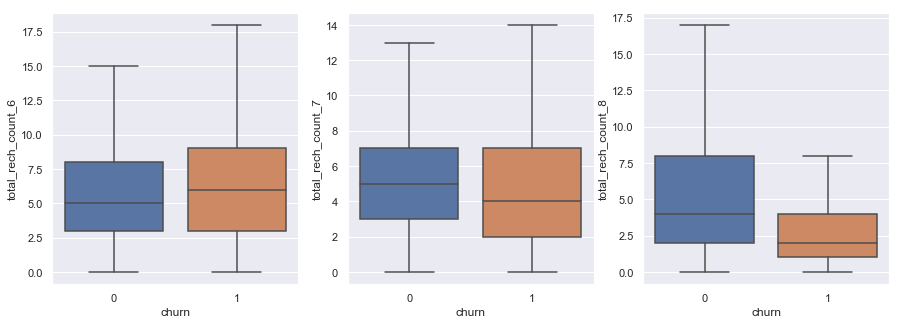

In [151]:
plt.figure(figsize = (15,5))
i = 1
for col in ['total_rech_count_6','total_rech_count_7','total_rech_count_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_6,showfliers = False)
    i = i+1
plt.show()

In [152]:
telecom_hvc_6[['total_rech_count_6','total_rech_count_7','total_rech_count_8','churn']].groupby('churn').median()

,total_rech_count_6,total_rech_count_7,total_rech_count_8
churn,,,
0,5.0,5.0,4.0
1,6.0,4.0,2.0


The number recharges also follow the similar trend of the recharge amounts

## Derived column: difference from consecutive months

In [153]:
telecom_hvc_6['diff_count_6_7'] = telecom_hvc_6['total_rech_count_6'] - telecom_hvc_6['total_rech_count_7']
telecom_hvc_6['diff_count_7_8'] = telecom_hvc_6['total_rech_count_7'] - telecom_hvc_6['total_rech_count_8']
telecom_hvc_6['diff_count_6_8'] = telecom_hvc_6['total_rech_count_6'] - telecom_hvc_6['total_rech_count_8']

In [154]:
telecom_hvc_6[['diff_count_6_7','diff_count_7_8','diff_count_6_8','churn']].groupby('churn').mean()

,diff_count_6_7,diff_count_7_8,diff_count_6_8
churn,,,
0,0.135557,-10.603269,-10.467712
1,1.753763,-0.002291,1.751473


We can see that in case of the non churn customers the mean of the difference in recharge counts is negative indicating that the recharge count is increasing with number of months, where as we can see that there is a decrease in case of churn customers

## Incoming calls

In [155]:
[col for col in telecom_hvc_6.columns if 'ic' in col]

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8']

### Total_incoming calls

In [156]:
telecom_hvc_6[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,29993.000000,29993.000000,29993.000000
mean,233.867798,236.446646,225.511518
std,289.822832,289.327448,282.969040
min,0.000000,0.000000,0.000000
25%,65.030000,68.490000,57.090000
50%,154.980000,156.590000,147.360000
75%,300.480000,302.210000,291.680000
90%,522.830000,526.256000,514.510000
95%,719.014000,724.174000,714.190000
99%,1310.470400,1341.648000,1319.779600


In [157]:
telecom_hvc_6[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].median()

total_ic_mou_6    154.98
total_ic_mou_7    156.59
total_ic_mou_8    147.36
dtype: float64

No observable trend, it is almost constant

### total_ic vs churn

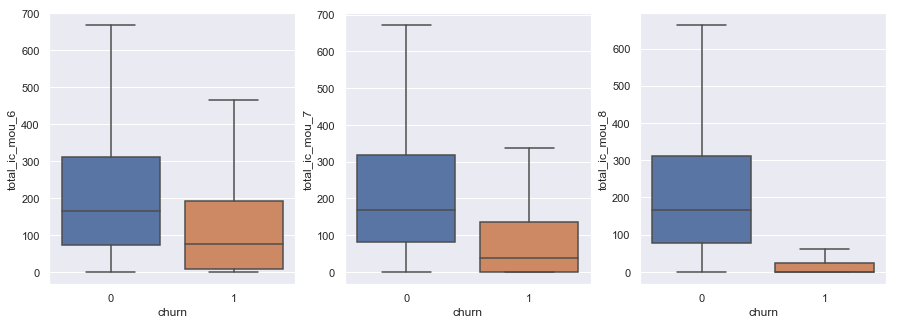

In [158]:
plt.figure(figsize = (15,5))
i = 1
for col in ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_6,showfliers = False)
    i = i+1
plt.show()

In [159]:
telecom_hvc_6[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']].groupby('churn').median()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,163.440,169.74,166.06
1,74.865,38.25,0.00


We can see that the non churn customers have almost similar median through the period where as for churn customers it is almost 0 in the 8th month

## Derived column: difference from consecutive months

In [160]:
telecom_hvc_6['diff_total_ic_6_7'] = telecom_hvc_6['total_ic_mou_6'] - telecom_hvc_6['total_ic_mou_7']
telecom_hvc_6['diff_total_ic_7_8'] = telecom_hvc_6['total_ic_mou_7'] - telecom_hvc_6['total_ic_mou_8']
telecom_hvc_6['diff_total_ic_6_8'] = telecom_hvc_6['total_ic_mou_6'] - telecom_hvc_6['total_ic_mou_8']

In [161]:
telecom_hvc_6[['diff_total_ic_6_7','diff_total_ic_7_8','diff_total_ic_6_8','churn']].groupby('churn').mean()

,diff_total_ic_6_7,diff_total_ic_7_8,diff_total_ic_6_8
churn,,,
0,-8.00357,4.184683,-3.818887
1,45.23717,70.436682,115.673851


We can see that for churn customers the total incoming calls seems to decrease consistently as we move to action phase

### Local incoming 

In [162]:
telecom_hvc_6[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
count,29993.000000,29993.000000,29993.000000
mean,185.382533,185.505296,177.899756
std,244.907919,239.662702,232.914501
min,0.000000,0.000000,0.000000
25%,42.340000,44.440000,36.160000
50%,115.130000,116.760000,110.610000
75%,240.910000,240.790000,233.990000
90%,430.850000,427.160000,418.638000
95%,594.372000,593.700000,588.444000
99%,1097.342000,1085.906000,1069.068000


In [163]:
telecom_hvc_6[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']].median()

loc_ic_mou_6    115.13
loc_ic_mou_7    116.76
loc_ic_mou_8    110.61
dtype: float64

No observable trend

### loc_ic vs churn

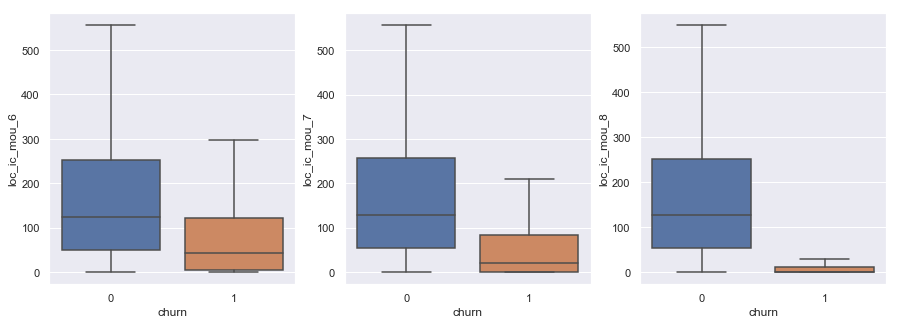

In [164]:
plt.figure(figsize = (15,5))
i = 1
for col in ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_6,showfliers = False)
    i = i+1
plt.show()

In [165]:
telecom_hvc_6[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']].groupby('churn').median()

,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
churn,,,
0,124.790,129.130,127.34
1,41.745,20.375,0.00


We can see that the non churn customers have almost similar median through the period where as for churn customers it is almost 0 in the 8th month

### std incoming 

In [166]:
telecom_hvc_6[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8
count,29993.000000,29993.000000,29993.000000
mean,37.936958,39.577909,36.753154
std,108.176457,114.381774,112.548092
min,0.000000,0.000000,0.000000
25%,0.910000,0.810000,0.350000
50%,9.880000,10.000000,8.080000
75%,34.710000,36.490000,33.160000
90%,89.588000,91.974000,85.504000
95%,152.800000,158.234000,149.730000
99%,429.234000,456.435600,428.302000


In [167]:
telecom_hvc_6[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']].median()

std_ic_mou_6     9.88
std_ic_mou_7    10.00
std_ic_mou_8     8.08
dtype: float64

No observable trend

### std_ic Vs churn

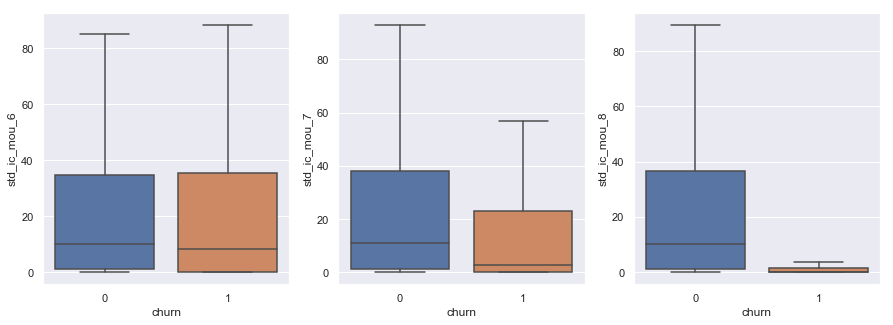

In [168]:
plt.figure(figsize = (15,5))
i = 1
for col in ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_6,showfliers = False)
    i = i+1
plt.show()

In [169]:
telecom_hvc_6[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']].groupby('churn').median()

,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8
churn,,,
0,10.010,10.91,10.08
1,8.215,2.53,0.00


We can see that the non churn customers have almost similar median through the period where as for churn customers it is almost 0 in the 8th month

### roam incoming 

In [170]:
telecom_hvc_6[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
count,29993.000000,29993.000000,29993.000000
mean,13.595912,10.059392,9.078529
std,69.552973,60.862585,54.549054
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,21.860000,11.590000,10.910000
95%,65.274000,41.542000,38.598000
99%,284.372400,218.292000,201.088400


In [171]:
telecom_hvc_6[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']].mean()

roam_ic_mou_6    13.595912
roam_ic_mou_7    10.059392
roam_ic_mou_8     9.078529
dtype: float64

### roam_og Vs churn

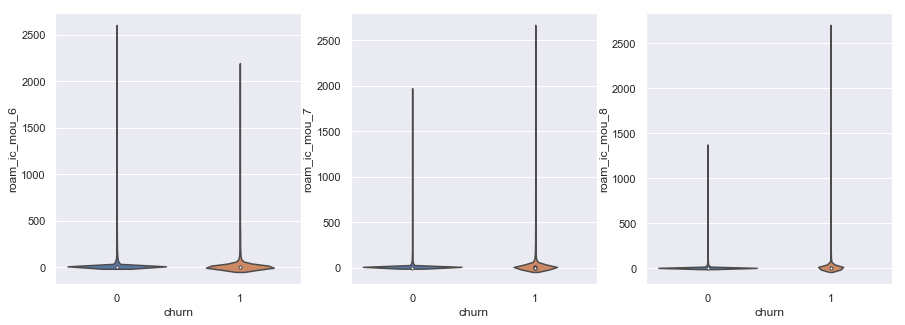

In [172]:
plt.figure(figsize = (15,5))
i = 1
for col in ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = telecom_hvc_6,showfliers = False)
    i = i+1
plt.show()

In [173]:
telecom_hvc_6[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']].groupby('churn').mean()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
churn,,,
0,12.126043,8.214641,7.565554
1,26.552012,26.319879,22.414588


The customers who have churned have large amount of roaming incoming calls than the non churned customers

## Out going calls

In [174]:
[col for col in telecom_hvc_6.columns if 'oc' in col]

['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8']

### Total_outgoing calls

In [175]:
telecom_hvc_6[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,29993.000000,29993.000000,29993.000000
mean,482.285361,486.965783,444.024928
std,583.663567,603.426215,592.858952
min,0.000000,0.000000,0.000000
25%,137.980000,134.510000,102.060000
50%,293.940000,288.510000,253.660000
75%,607.390000,612.180000,562.240000
90%,1127.050000,1146.048000,1071.664000
95%,1560.710000,1614.184000,1527.642000
99%,2818.066000,2890.631200,2777.234000


In [176]:
telecom_hvc_6[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].median()

total_og_mou_6    293.94
total_og_mou_7    288.51
total_og_mou_8    253.66
dtype: float64

In the first two months there is a slight decrease where as there is a sharp decrease from 7 th to 8th month

### total_og vs churn

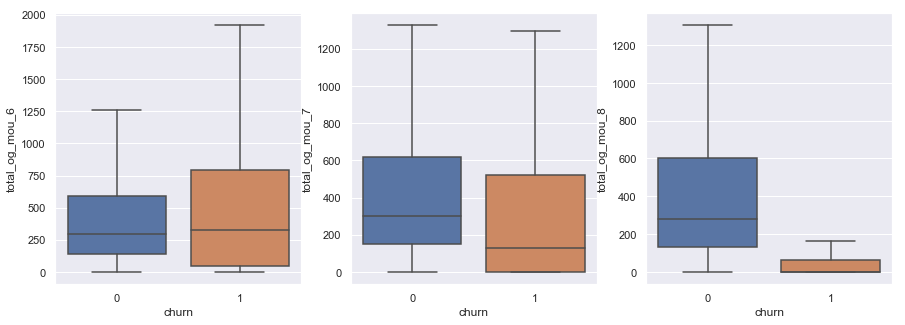

In [177]:
plt.figure(figsize = (15,5))
i = 1
for col in ['total_og_mou_6','total_og_mou_7','total_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_6,showfliers = False)
    i = i+1
plt.show()

In [178]:
telecom_hvc_6[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']].groupby('churn').median()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,292.19,299.880,282.28
1,328.66,130.275,0.00


We can see that in the intial month the median oc calls is similar, but it kept decreasing with very steep decent through the months.

## Derived column: difference from consecutive months

In [179]:
telecom_hvc_6['diff_total_og_6_7'] = telecom_hvc_6['total_og_mou_6'] - telecom_hvc_6['total_og_mou_7']
telecom_hvc_6['diff_total_og_7_8'] = telecom_hvc_6['total_og_mou_7'] - telecom_hvc_6['total_og_mou_8']
telecom_hvc_6['diff_total_og_6_8'] = telecom_hvc_6['total_og_mou_6'] - telecom_hvc_6['total_og_mou_8']

In [180]:
telecom_hvc_6[['diff_total_og_6_7','diff_total_og_7_8','diff_total_og_6_8','churn']].groupby('churn').mean()

,diff_total_og_6_7,diff_total_og_7_8,diff_total_og_6_8
churn,,,
0,-23.990836,17.150665,-6.840172
1,165.530517,270.267543,435.798060


For the churn customers the decrease in total out calls is very high, which says that the churn customers tend to make less number of calls in the action phase

### Local outgoing 

In [181]:
telecom_hvc_6[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
count,29993.000000,29993.000000,29993.000000
mean,200.915926,198.697392,188.648116
std,288.217994,284.263055,285.428089
min,0.000000,0.000000,0.000000
25%,36.260000,37.440000,27.090000
50%,115.980000,115.340000,104.230000
75%,255.040000,249.490000,240.240000
90%,472.430000,466.534000,454.504000
95%,683.148000,673.740000,662.506000
99%,1319.512400,1314.182000,1297.506800


In [182]:
telecom_hvc_6[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']].median()

loc_og_mou_6    115.98
loc_og_mou_7    115.34
loc_og_mou_8    104.23
dtype: float64

in the intial two months the og calls are almost same where as there is a slight dip in the final month

### loc_og vs churn

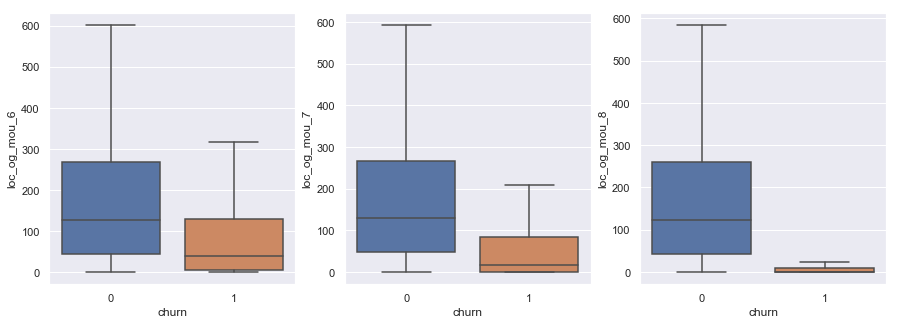

In [183]:
plt.figure(figsize = (15,5))
i = 1
for col in ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_6,showfliers = False)
    i = i+1
plt.show()

In [184]:
telecom_hvc_6[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']].groupby('churn').median()

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
churn,,,
0,125.84,128.630,122.51
1,39.03,16.915,0.00


We can see that the non churn customers have almost similar median through the period where as for churn customers it is almost 0 in the 8th month and also they have significantly lower og calls when compared to non churn cutomers

### std outgoing 

In [185]:
telecom_hvc_6[['std_og_mou_6','std_og_mou_7','std_og_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,std_og_mou_6,std_og_mou_7,std_og_mou_8
count,29993.000000,29993.000000,29993.000000
mean,276.097448,282.656781,249.899898
std,522.965017,542.637007,522.911162
min,0.000000,0.000000,0.000000
25%,1.630000,1.050000,0.000000
50%,45.310000,42.640000,26.630000
75%,324.160000,332.110000,262.010000
90%,846.994000,875.910000,786.256000
95%,1274.712000,1322.660000,1214.310000
99%,2438.496000,2539.339600,2374.200800


In [186]:
telecom_hvc_6[['std_og_mou_6','std_og_mou_7','std_og_mou_8']].median()

std_og_mou_6    45.31
std_og_mou_7    42.64
std_og_mou_8    26.63
dtype: float64

The std og calls are almost same in the first two months where as there is a sharp decrease in the 8th month

### std_og Vs churn

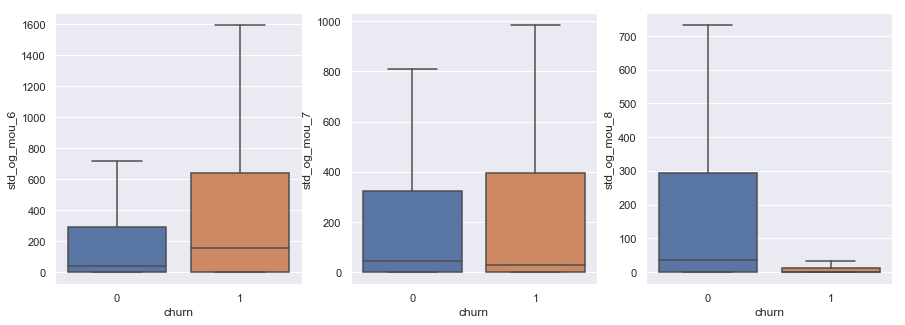

In [187]:
plt.figure(figsize = (15,5))
i = 1
for col in ['std_og_mou_6','std_og_mou_7','std_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = telecom_hvc_6,showfliers = False)
    i = i+1
plt.show()

In [188]:
telecom_hvc_6[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']].groupby('churn').median()

,std_og_mou_6,std_og_mou_7,std_og_mou_8
churn,,,
0,41.230,43.660,36.09
1,153.495,28.815,0.00


We can see that the non churn customers have almost similar median through the period where as for churn customers it is almost 0 in the 8th month and also we can see that the decrease is very huge.

### roam outgoing 

In [189]:
telecom_hvc_6[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
count,29993.000000,29993.000000,29993.000000
mean,22.476352,16.394742,15.199044
std,98.141185,81.450286,89.587733
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,43.806000,26.856000,20.274000
95%,120.986000,80.124000,69.188000
99%,446.507600,344.198000,320.041200


In [190]:
telecom_hvc_6[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].mean()

roam_og_mou_6    22.476352
roam_og_mou_7    16.394742
roam_og_mou_8    15.199044
dtype: float64

### roam_og Vs churn

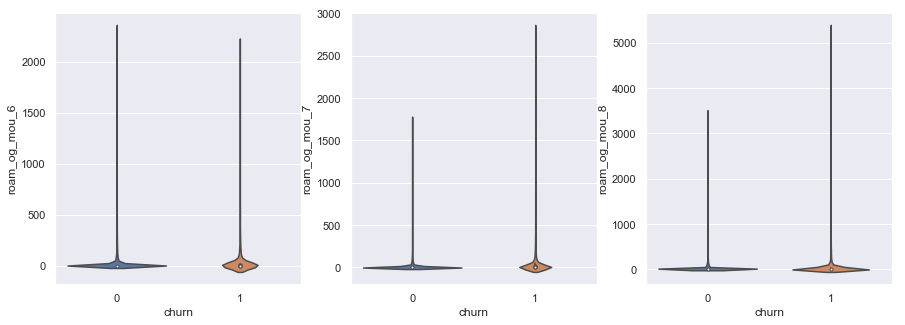

In [191]:
plt.figure(figsize = (15,5))
i = 1
for col in ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = telecom_hvc_6,showfliers = False)
    i = i+1
plt.show()

In [192]:
telecom_hvc_6[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','churn']].groupby('churn').mean()

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
churn,,,
0,20.129538,13.821743,13.045639
1,43.162258,39.074355,34.180154


The customers who have churned have large amount of std out going calls in the 6th month, but as with the progession their roam outgoing calls have also decreased.

## AON

In [193]:
telecom_hvc_6[['aon']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,aon
count,29993.000000
mean,1417.516587
std,1019.709086
min,180.000000
25%,509.000000
50%,1101.000000
75%,2339.000000
90%,2984.000000
95%,3242.000000
99%,3651.000000


### Aon Vs churn

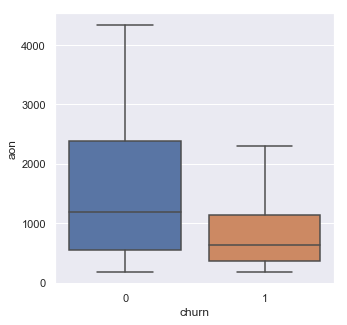

In [194]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'churn',y = 'aon',data = telecom_hvc_6,showfliers = False)
plt.show()

In [195]:
telecom_hvc_6[['aon','churn']].groupby('churn').median()

,aon
churn,
0,1184
1,630


The median on age on network of people who chrun is almost half of that of the non churn customers.

## 2G and 3G

In [196]:
internet_cols = [col for col in telecom_hvc_6.columns if '_2g' in col or '_3g' in col]

In [197]:
internet_cols

['vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'vbc_3g_8',
 'vbc_3g_7',
 'vbc_3g_6']

In [198]:
print('vol_2g_mb_8')
print('*'*40)
print(pd.crosstab(telecom_hvc_6.vol_2g_mb_8,telecom_hvc_6.churn).head())
print(3010/telecom_hvc_6.churn.value_counts()[1])
print('\nvol_3g_mb_8')
print('*'*40)
print(pd.crosstab(telecom_hvc_6.vol_3g_mb_8,telecom_hvc_6.churn).head())
print(3035/telecom_hvc_6.churn.value_counts()[1])
print('\nmonthly_2g_8')
print('*'*40)
print(pd.crosstab(telecom_hvc_6.monthly_2g_8,telecom_hvc_6.churn).head())
print(3045/telecom_hvc_6.churn.value_counts()[1])
print('\nsachet_2g_8')
print('*'*40)
print(pd.crosstab(telecom_hvc_6.sachet_2g_8,telecom_hvc_6.churn).head())
print(2979/telecom_hvc_6.churn.value_counts()[1])
print('\nvbc_3g_8')
print('*'*40)
print(pd.crosstab(telecom_hvc_6.vbc_3g_8,telecom_hvc_6.churn).head())
print(2969/telecom_hvc_6.churn.value_counts()[1])
print('\nvbc_3g_7')
print('*'*40)
print(pd.crosstab(telecom_hvc_6.vbc_3g_7,telecom_hvc_6.churn).head())
print(2941/telecom_hvc_6.churn.value_counts()[1])
print('\nvbc_3g_6')
print('*'*40)
print(pd.crosstab(telecom_hvc_6.vbc_3g_6,telecom_hvc_6.churn).head())
print(2889/telecom_hvc_6.churn.value_counts()[1])

vol_2g_mb_8
****************************************
churn            0     1
vol_2g_mb_8             
0.00         25419  3010
0.01            22     2
0.02            23     1
0.03            12     0
0.04            13     1
0.9849476439790575

vol_3g_mb_8
****************************************
churn            0     1
vol_3g_mb_8             
0.00         26081  3035
0.01             2     0
0.02             0     1
0.03             3     0
0.04             3     0
0.993128272251309

monthly_2g_8
****************************************
churn             0     1
monthly_2g_8             
0             26467  3045
1               450    11
2                20     0
0.9964005235602095

sachet_2g_8
****************************************
churn            0     1
sachet_2g_8             
0            25349  2979
1              920    59
2              240     6
3              153     6
4              135     1
0.974803664921466

vbc_3g_8
****************************************
chur

we can see that more than 94% of the churn customers are using 0 in vbc columns. hence these columns are not providing any additional info. Therefore dropping these columns 

In [199]:
telecom_hvc_7 = telecom_hvc_6.drop(internet_cols,axis = 1)

In [200]:
telecom_hvc_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 125 entries, arpu_6 to diff_total_og_6_8
dtypes: float64(108), int64(17)
memory usage: 30.1 MB


In [201]:
telecom_hvc_7.columns.tolist()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',


## Arpu

In [202]:
telecom_hvc_7[['arpu_6','arpu_7','arpu_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,arpu_6,arpu_7,arpu_8
count,29993.000000,29993.000000,29993.000000
mean,364.138424,354.471113,339.032113
std,406.375615,420.164356,437.148556
min,-2258.709000,-2014.045000,-945.808000
25%,162.051000,152.228000,128.399000
50%,275.377000,264.980000,251.762000
75%,458.218000,448.944000,441.223000
90%,724.938000,710.024800,702.272800
95%,945.099000,935.214800,923.436000
99%,1580.735560,1555.759400,1584.929560


In [203]:
telecom_hvc_7[['arpu_6','arpu_7','arpu_8']].mean()

arpu_6    364.138424
arpu_7    354.471113
arpu_8    339.032113
dtype: float64

### arpu Vs churn

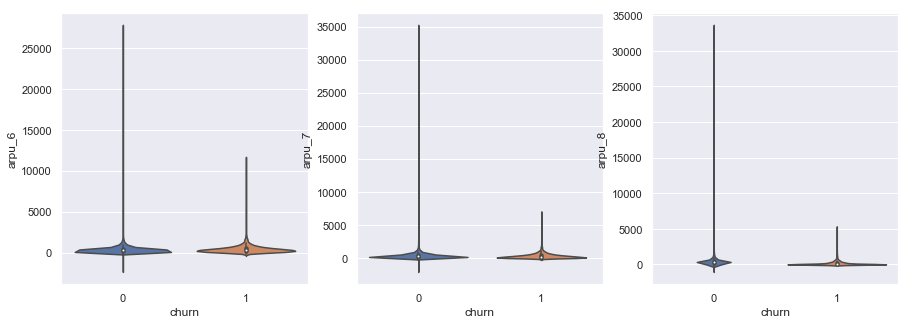

In [204]:
plt.figure(figsize = (15,5))
i = 1
for col in ['arpu_6','arpu_7','arpu_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = telecom_hvc_7,showfliers = False)
    i = i+1
plt.show()

In [205]:
telecom_hvc_7[['arpu_6','arpu_7','arpu_8','churn']].groupby('churn').mean()

,arpu_6,arpu_7,arpu_8
churn,,,
0,356.845905,359.705374,361.033007
1,428.418073,308.333904,145.106040


The customers who have churned have large revenue in the 6th month, but as with the progession their revenue have also decreased.

## Onnet

In [206]:
telecom_hvc_7[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,29993.000000,29993.000000,29993.000000
mean,205.728251,206.059425,187.746703
std,381.077968,389.588169,379.926817
min,0.000000,0.000000,0.000000
25%,22.630000,20.680000,14.730000
50%,72.740000,68.290000,57.140000
75%,209.060000,205.890000,179.910000
90%,552.080000,554.306000,509.950000
95%,890.050000,910.262000,851.030000
99%,1838.914400,1886.669600,1854.547200


In [207]:
telecom_hvc_7[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].mean()

onnet_mou_6    205.728251
onnet_mou_7    206.059425
onnet_mou_8    187.746703
dtype: float64

### onnet Vs churn

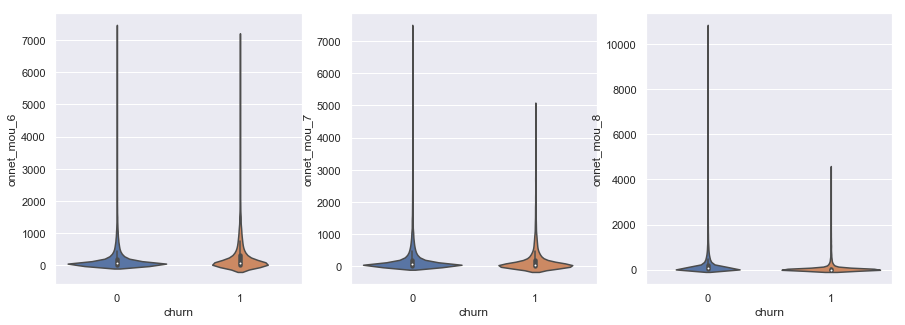

In [208]:
plt.figure(figsize = (15,5))
i = 1
for col in ['onnet_mou_6','onnet_mou_7','onnet_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = telecom_hvc_7,showfliers = False)
    i = i+1
plt.show()

In [209]:
telecom_hvc_7[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']].groupby('churn').mean()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
churn,,,
0,197.755435,207.145691,200.664665
1,276.004346,196.484575,73.881803


The customers who have churned has a decreasing onnnet calls per month as we move from 6 to 8th months.

## Offnet

In [210]:
telecom_hvc_7[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,29993.000000,29993.000000,29993.000000
mean,297.927422,295.803861,270.019012
std,402.515092,418.322913,410.521989
min,0.000000,0.000000,0.000000
25%,81.690000,75.690000,58.240000
50%,174.530000,169.390000,149.510000
75%,353.160000,348.310000,323.240000
90%,679.234000,677.180000,628.756000
95%,1003.150000,1002.980000,925.070000
99%,1972.165600,2044.945600,1901.968000


In [211]:
telecom_hvc_7[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].mean()

offnet_mou_6    297.927422
offnet_mou_7    295.803861
offnet_mou_8    270.019012
dtype: float64

### offnet Vs churn

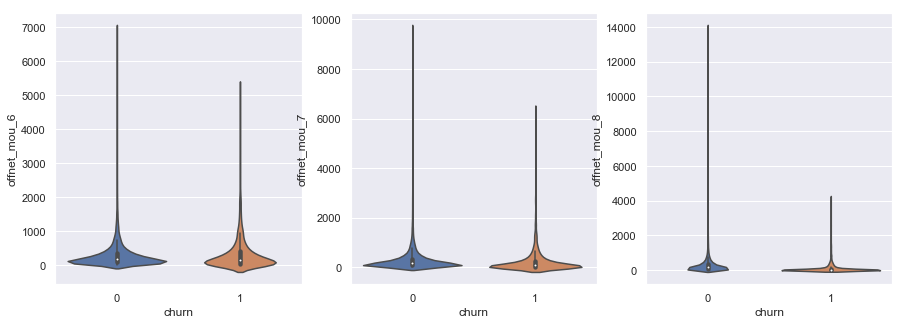

In [212]:
plt.figure(figsize = (15,5))
i = 1
for col in ['offnet_mou_6','offnet_mou_7','offnet_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = telecom_hvc_7,showfliers = False)
    i = i+1
plt.show()

In [213]:
telecom_hvc_7[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']].groupby('churn').mean()

,offnet_mou_6,offnet_mou_7,offnet_mou_8
churn,,,
0,293.943998,301.804984,290.294512
1,333.039166,242.907179,91.301355


The customers who have churned has a decreasing offnet calls per month as we move from 6 to 8th months.

## Is_rech

In [214]:
telecom_hvc_7[['is_rech_6','is_rech_7','is_rech_8']].mean()

is_rech_6    0.984896
is_rech_7    0.976161
is_rech_8    0.948788
dtype: float64

### is_rech Vs churn

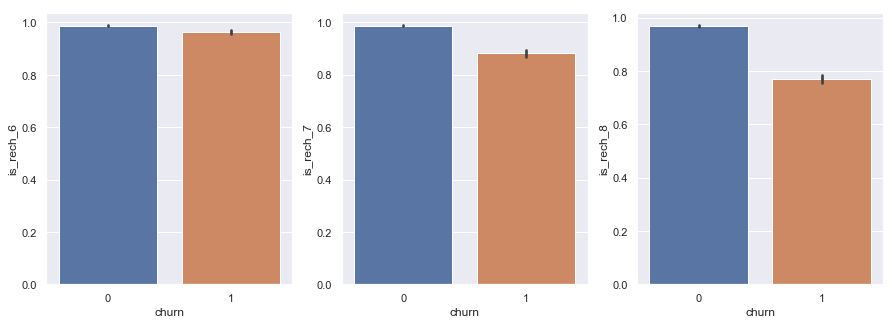

In [215]:
plt.figure(figsize = (15,5))
i = 1
for col in ['is_rech_6','is_rech_7','is_rech_8']:
    plt.subplot(1,3,i)
    sns.barplot(x = 'churn',y = col,data = telecom_hvc_7)
    i = i+1
plt.show()

In [216]:
telecom_hvc_7[['is_rech_6','is_rech_7','is_rech_8','churn']].groupby('churn').mean()

,is_rech_6,is_rech_7,is_rech_8
churn,,,
0,0.987267,0.986895,0.969039
1,0.964005,0.881545,0.770288


The customers who have churned has stopped recharging their mobiles as the months progress from 6 to 8th which can be seen in decrease in is_rech values, which is a derived column from last_day_of_rech

# Correlated variables

## ic variables

In [217]:
ic_cols = [col for col in telecom_hvc_7.columns if '_ic' in col]
ic_cols.append('churn')

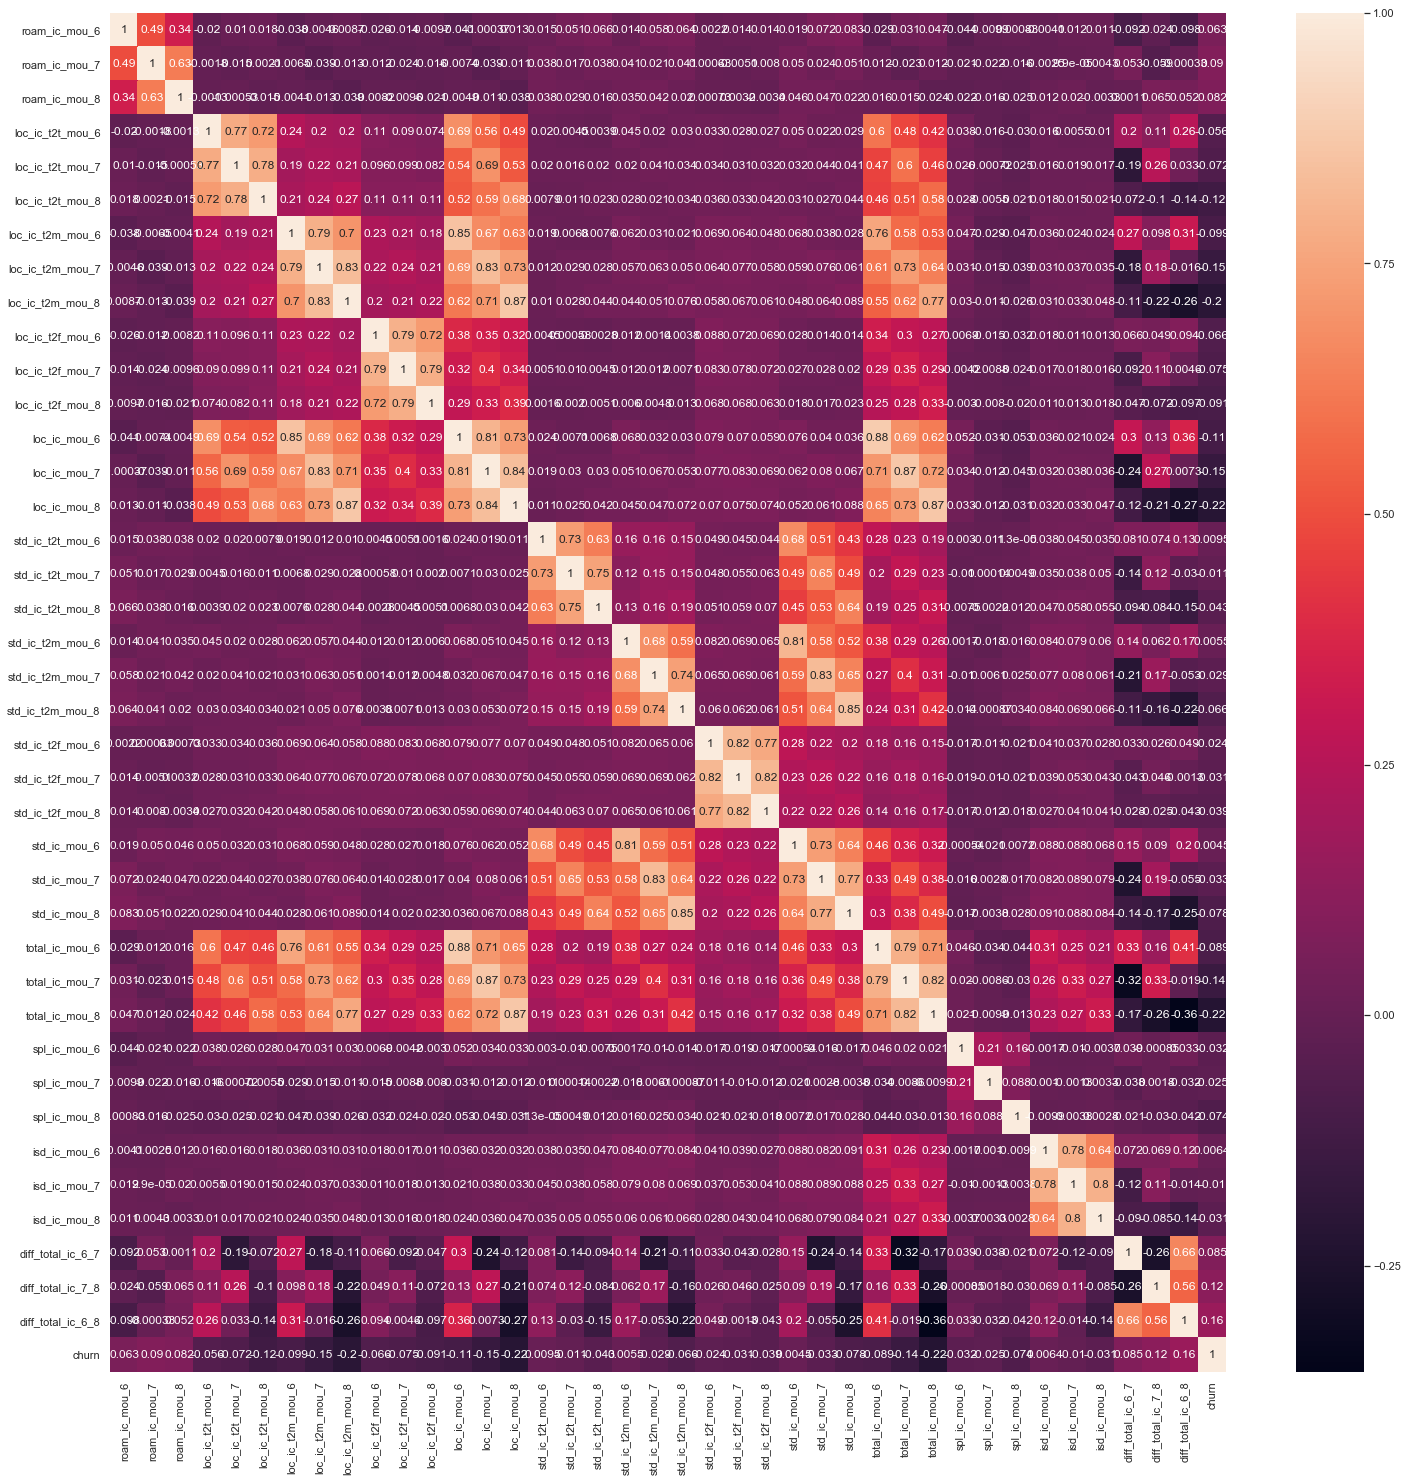

In [218]:
plt.figure(figsize = (25,25))
sns.heatmap(telecom_hvc_7[ic_cols].corr(),annot = True)
plt.show()

We can see that there are quite a few number of variables correlated and this is expected because the total variables are obtained from the indiavidual variables. We can also see that there is a high correlation among corresponding variables for different months.We can also expect similar trend among other variables as well. Let the model handle these correlated variables.

## Correlation with Churn variable

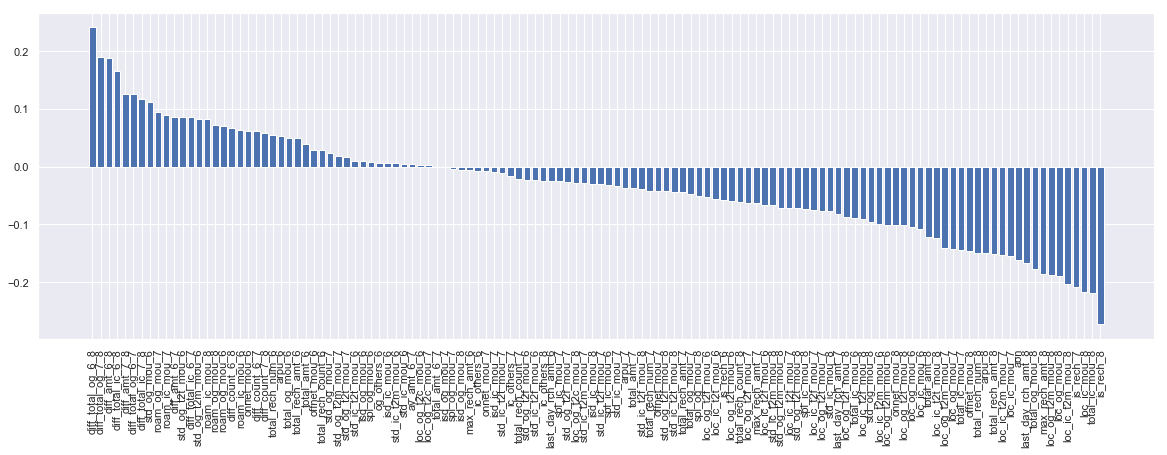

In [219]:
corr = telecom_hvc_7.corr()['churn'].sort_values(ascending = False)[1:]
plt.figure(figsize = (20,6))
plt.bar(range(len(corr)),corr)
plt.xticks(range(len(corr)),corr.index,rotation = 'vertical')
plt.show()

We can see that the drop of og calls and not recharging the mobiles in the 8th seems to signify that the customer is going to churn. We can also see that the std and roam variables are also contributing to the churn positively where as max rech and total calls seems to effect the churn negatively.

## Creating difference variables and averaging the first two months

In [220]:
telecom_hvc_8 = telecom_hvc_7.drop(['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','og_others_6','av_amt_6_7','total_amt_6_7'],axis = 1)

In [221]:
telecom_hvc_8.drop([col for col in telecom_hvc_8.columns if 'diff_' in col],axis = 1,inplace = True)

In [222]:
cols_to_excempt = ['is_rech_6','is_rech_7','is_rech_8']

In [223]:
telecom_hvc_8.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'total_amt_6', 'total_amt_7', 'total_amt_8', 'total_rech_count_6',
       'total_rech_count_7', 'total_rech_count_8', 'churn', 'is_rech_6',
       'is_rech_7', 'is_rech_8'],
      dtype='object', length=104)

In [224]:
#telecom_hvc_8.drop('total_ic_6_7_8',axis = 1,inplace = True)

In [225]:
six_cols = []
seven_cols = []
for x in telecom_hvc_8.columns:
    if '_6' in x and x not in cols_to_excempt :
        six_cols.append(x)
    if '_7' in x and x not in cols_to_excempt :
        seven_cols.append(x)

In [226]:
six_cols1 = [x.replace('_6','') for x in six_cols]

In [227]:
telecom_hvc_9 = telecom_hvc_8.copy()

In [228]:
for x in six_cols1:
    out = 'av_'+x+'_6_7'
    in_6 = x+'_6'
    in_7 = x+'_7'
    telecom_hvc_9[out] = (telecom_hvc_9[in_6]+telecom_hvc_9[in_7])/2

In [229]:
for x in six_cols1:
    out1 = 'diff_'+x
    in_av = 'av_'+x+'_6_7'
    in_8 = x+'_8'
    telecom_hvc_9[out1] = telecom_hvc_9[in_av]-telecom_hvc_9[in_8]

In [230]:
telecom_hvc_9.drop(six_cols+seven_cols,axis = 1,inplace = True)

In [231]:
telecom_hvc_9.columns.tolist()

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'aon',
 'total_amt_8',
 'total_rech_count_8',
 'churn',
 'is_rech_6',
 'is_rech_7',
 'is_rech_8',
 'av_arpu_6_7',
 'av_onnet_mou_6_7',
 'av_offnet_mou_6_7',
 'av_roam_ic_mou_6_7',
 'av_roam_og_mou_6_7',
 'av_loc_og_t2t_mou_6_7',
 'av_loc_og_t2m_mou_6_7',
 'av_loc_og_t2f_mou_6_7',
 'av_loc_og_t2c_mou_6_7',
 'av_loc_og_mou_6_7',
 'av_std_og_t2t_mou_6_7',
 'av_std_og_t2m_mou_6_7',
 'av_std_og_t2f_mou_6_7',
 'av_st

In [232]:
telecom_hvc_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29993 entries, 7001625959 to 7000342369
Columns: 104 entries, arpu_8 to diff_total_rech_count
dtypes: float64(97), int64(7)
memory usage: 24.0 MB


## Handling class imbalance

In [233]:
X = telecom_hvc_9.drop('churn',axis=1)
y = telecom_hvc_9.churn

In [234]:
print(len(y))
print('\n')
print(y.value_counts())

29993


0    26937
1     3056
Name: churn, dtype: int64


In [235]:
smote = SMOTE(kind = "regular",random_state = 28)
X_balanced, y_balanced = smote.fit_sample(X, y)

In [236]:
print(len(y_balanced))
print('\n')
print(pd.Series(y_balanced).value_counts())

53874


1    26937
0    26937
dtype: int64


We can see that the class imbalance is handled after SMOTE

# 4.Test train split and Feature scaling

In [237]:
index_list = []
for x in range(1,len(X_balanced)+1):
    index_list.append('I'+str(x))

In [238]:
X_balanced = pd.DataFrame(X_balanced,columns = X.columns)

In [239]:
X_balanced.index = index_list

In [240]:
y_balanced = pd.Series(y_balanced,index = index_list)

In [241]:
y_balanced.index = index_list

In [242]:
X_train,X_test,y_train,y_test = train_test_split(X_balanced,y_balanced,train_size = 0.8,test_size = 0.2,stratify = y_balanced,random_state = 28)

In [243]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [244]:
len(X_train.index)

43099

In [245]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_train_scaled.index = X_train.index

In [246]:
X_train_scaled.shape

(43099, 103)

In [247]:
X_train.shape

(43099, 103)

In [248]:
X_train_scaled.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_amt_8,total_rech_count_8,is_rech_6,is_rech_7,is_rech_8,av_arpu_6_7,av_onnet_mou_6_7,av_offnet_mou_6_7,av_roam_ic_mou_6_7,av_roam_og_mou_6_7,av_loc_og_t2t_mou_6_7,av_loc_og_t2m_mou_6_7,av_loc_og_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_loc_og_mou_6_7,av_std_og_t2t_mou_6_7,av_std_og_t2m_mou_6_7,av_std_og_t2f_mou_6_7,av_std_og_mou_6_7,av_isd_og_mou_6_7,av_spl_og_mou_6_7,av_total_og_mou_6_7,av_loc_ic_t2t_mou_6_7,av_loc_ic_t2m_mou_6_7,av_loc_ic_t2f_mou_6_7,av_loc_ic_mou_6_7,av_std_ic_t2t_mou_6_7,av_std_ic_t2m_mou_6_7,av_std_ic_t2f_mou_6_7,av_std_ic_mou_6_7,av_total_ic_mou_6_7,av_spl_ic_mou_6_7,av_isd_ic_mou_6_7,av_ic_others_6_7,av_max_rech_amt_6_7,av_last_day_rch_amt_6_7,av_total_amt_6_7,av_total_rech_count_6_7,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_amt,diff_total_rech_count
I12699,0.313649,0.109249,-0.181316,0.003114,-0.195529,-0.297986,-0.446293,-0.238189,-0.167379,-0.472163,0.268090,0.085943,-0.130935,0.228166,-0.028677,-0.212747,-0.019266,-0.034553,-0.427235,-0.222032,-0.346390,-0.188086,0.034607,-0.104751,-0.072840,-0.337629,-0.186057,-0.118021,-0.054332,0.242984,-0.517810,-0.732662,0.223843,-0.087752,0.175383,0.293893,0.430216,-0.050460,0.002172,-0.224812,-0.182445,-0.262976,-0.378020,-0.501658,-0.194527,-0.246917,-0.560244,0.165293,0.048198,-0.162248,0.141609,-0.045967,-0.278365,-0.111364,-0.325605,-0.592917,-0.275054,-0.600213,-0.255630,-0.197220,-0.13216,-0.290174,-0.644658,-0.40868,-0.160696,-0.081781,-0.120434,-0.278243,-0.059094,0.409538,-0.461895,-0.109654,-0.069624,-0.221246,-0.063746,-0.125203,-0.105649,-0.025178,-0.017949,-0.146850,-0.065179,-0.028113,-0.053333,-0.062141,-0.051873,-0.049616,-0.104212,-0.449475,-0.242165,-0.098342,-0.405401,-0.097797,-0.274638,-0.051791,-0.270459,-0.443262,-0.158737,-0.067728,-0.044940,-0.390861,0.306211,-0.366916,0.162032
I17582,0.675349,2.028932,-0.078286,-0.184642,-0.218071,0.289205,0.043930,-0.238189,-0.167379,0.166781,2.179802,-0.048972,-0.130935,1.384793,-0.028677,-0.088247,1.256669,0.184182,-0.145823,-0.222032,-0.054156,-0.186490,-0.227217,-0.068988,-0.267749,-0.131393,-0.186057,0.069257,-0.076243,0.242984,0.627777,-1.041581,0.648970,-0.021396,0.175383,0.293893,0.430216,0.321334,1.159783,-0.489009,0.233028,-0.006019,-0.193709,-0.436803,-0.211871,-0.246917,-0.419854,1.264385,-0.276572,-0.162248,0.674792,-0.045967,-0.278365,0.439519,-0.231655,-0.552136,-0.296682,-0.530534,-0.246112,-0.329125,-0.13216,-0.384439,-0.610309,-0.40868,-0.113892,-0.081781,-0.692043,-0.392974,0.256358,0.725165,-0.474694,-0.698183,-0.480754,0.507404,0.232728,-0.673635,-0.686036,-0.045828,-0.017949,-0.864480,-0.625402,-0.271131,-0.053333,-0.590255,-0.051873,-0.173354,-0.801857,-0.597940,-0.577331,-0.131530,-0.721277,-0.088313,-0.114421,-0.111350,-0.147910,-0.675904,-0.158737,-0.231654,-0.023511,-0.936799,-0.936065,-0.592385,0.150797
I27307,0.212293,-0.093870,-0.213886,-0.076378,0.947559,-0.297986,-0.424762,-0.238189,-0.167379,-0.457639,-0.105731,-0.206573,-0.130935,-0.206219,-0.028677,-0.212747,-0.385482,-0.341653,-0.338092,-0.226

In [249]:
X_test_scaled = scaler.transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)
X_test_scaled.index = X_test.index

In [250]:
X_test.shape

(10775, 103)

In [251]:
X_test_scaled.shape

(10775, 103)

In [252]:
X_test_scaled.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_amt_8,total_rech_count_8,is_rech_6,is_rech_7,is_rech_8,av_arpu_6_7,av_onnet_mou_6_7,av_offnet_mou_6_7,av_roam_ic_mou_6_7,av_roam_og_mou_6_7,av_loc_og_t2t_mou_6_7,av_loc_og_t2m_mou_6_7,av_loc_og_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_loc_og_mou_6_7,av_std_og_t2t_mou_6_7,av_std_og_t2m_mou_6_7,av_std_og_t2f_mou_6_7,av_std_og_mou_6_7,av_isd_og_mou_6_7,av_spl_og_mou_6_7,av_total_og_mou_6_7,av_loc_ic_t2t_mou_6_7,av_loc_ic_t2m_mou_6_7,av_loc_ic_t2f_mou_6_7,av_loc_ic_mou_6_7,av_std_ic_t2t_mou_6_7,av_std_ic_t2m_mou_6_7,av_std_ic_t2f_mou_6_7,av_std_ic_mou_6_7,av_total_ic_mou_6_7,av_spl_ic_mou_6_7,av_isd_ic_mou_6_7,av_ic_others_6_7,av_max_rech_amt_6_7,av_last_day_rch_amt_6_7,av_total_amt_6_7,av_total_rech_count_6_7,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_amt,diff_total_rech_count
I40049,-0.467401,-0.341622,-0.473873,0.116984,0.193341,-0.297986,-0.485465,-0.238189,-0.167379,-0.498587,-0.306580,-0.308025,-0.130935,-0.403255,-0.028677,-0.212747,-0.572473,-0.341653,-0.527402,-0.242088,-0.556093,-0.188086,-0.227217,-0.104751,-0.274947,-0.586725,-0.186057,-0.125773,-0.076243,-0.706282,-0.502839,0.200472,-0.445781,-0.131990,0.175383,0.293893,0.430216,0.031338,1.219676,-0.398039,-0.086638,-0.028763,-0.321225,-0.473425,-0.199199,0.139806,-0.511249,1.409250,-0.197602,-0.162248,0.825702,-0.045967,-0.048594,0.546126,-0.336720,-0.064892,-0.256298,-0.249106,-0.076033,-0.125221,-0.132160,-0.152980,-0.301079,-0.40868,-0.157529,-0.081781,-0.125414,0.332178,0.087253,-0.000166,0.635294,1.809094,0.035954,-0.248797,-0.242400,-0.044644,-0.011407,-0.030739,0.284249,-0.035881,1.991218,0.072107,-0.053333,1.351533,-0.051873,0.165873,1.196377,-0.057213,0.644459,-0.040318,0.425548,0.113692,0.126347,-0.051791,0.148053,0.377034,-0.158737,-0.054289,-0.023511,0.681990,0.763239,0.697168,0.134054
I12138,-0.615716,-0.411350,-0.513589,-0.166174,-0.218071,-0.297986,-0.466917,-0.238189,-0.167379,-0.486075,-0.306580,-0.303872,-0.130935,-0.400543,-0.028677,-0.212747,-0.564631,-0.341653,-0.520374,-0.242088,-0.551235,-0.188086,-0.227217,-0.104751,-0.274947,-0.582733,-0.186057,-0.125773,-0.076243,-0.718852,-0.517810,-1.059383,-0.456048,-0.198347,0.175383,0.293893,0.430216,0.766711,0.250966,1.786562,-0.229689,-0.263185,-0.366756,-0.517048,-0.221190,0.498333,-0.567082,0.424234,2.306042,-0.162248,1.813065,-0.045967,0.287775,1.442985,-0.389341,-0.622745,-0.296682,-0.654763,-0.091137,0.230036,-0.132160,0.105782,-0.546309,-0.40868,-0.155902,-0.081781,-0.604103,-0.851900,0.580413,1.293293,1.713940,0.722673,2.589386,-0.066873,-0.039253,-0.109226,-0.099369,-0.056924,0.564415,-0.136834,0.809967,2.954052,-0.053333,2.488295,-0.051873,0.481335,2.187013,-0.137293,-0.154333,-0.102288,-0.192584,0.095906,0.545829,-0.051791,0.469044,0.028143,-0.158737,-0.052169,-0.023511,0.239068,-0.137459,1.254563,0.431668
I50555,-0.616976,-0.411350,-0.524079,-0.184642,-0.218071,-0.297986,-0.485465,-0.238189,-0.091138,-0.498587,-0.306580,-0.308025,-0.130935,-0.403255,-0.028677,-0.183157,-0.571719,-0.341653,-0.490227,-0.242088,-0.530397,-

# 5. Model Building

## 5.1 Logistic Regression model

In [253]:
X_train_scaled.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_amt_8,total_rech_count_8,is_rech_6,is_rech_7,is_rech_8,av_arpu_6_7,av_onnet_mou_6_7,av_offnet_mou_6_7,av_roam_ic_mou_6_7,av_roam_og_mou_6_7,av_loc_og_t2t_mou_6_7,av_loc_og_t2m_mou_6_7,av_loc_og_t2f_mou_6_7,av_loc_og_t2c_mou_6_7,av_loc_og_mou_6_7,av_std_og_t2t_mou_6_7,av_std_og_t2m_mou_6_7,av_std_og_t2f_mou_6_7,av_std_og_mou_6_7,av_isd_og_mou_6_7,av_spl_og_mou_6_7,av_total_og_mou_6_7,av_loc_ic_t2t_mou_6_7,av_loc_ic_t2m_mou_6_7,av_loc_ic_t2f_mou_6_7,av_loc_ic_mou_6_7,av_std_ic_t2t_mou_6_7,av_std_ic_t2m_mou_6_7,av_std_ic_t2f_mou_6_7,av_std_ic_mou_6_7,av_total_ic_mou_6_7,av_spl_ic_mou_6_7,av_isd_ic_mou_6_7,av_ic_others_6_7,av_max_rech_amt_6_7,av_last_day_rch_amt_6_7,av_total_amt_6_7,av_total_rech_count_6_7,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_amt,diff_total_rech_count
I12699,0.313649,0.109249,-0.181316,0.003114,-0.195529,-0.297986,-0.446293,-0.238189,-0.167379,-0.472163,0.268090,0.085943,-0.130935,0.228166,-0.028677,-0.212747,-0.019266,-0.034553,-0.427235,-0.222032,-0.346390,-0.188086,0.034607,-0.104751,-0.072840,-0.337629,-0.186057,-0.118021,-0.054332,0.242984,-0.517810,-0.732662,0.223843,-0.087752,0.175383,0.293893,0.430216,-0.050460,0.002172,-0.224812,-0.182445,-0.262976,-0.378020,-0.501658,-0.194527,-0.246917,-0.560244,0.165293,0.048198,-0.162248,0.141609,-0.045967,-0.278365,-0.111364,-0.325605,-0.592917,-0.275054,-0.600213,-0.255630,-0.197220,-0.13216,-0.290174,-0.644658,-0.40868,-0.160696,-0.081781,-0.120434,-0.278243,-0.059094,0.409538,-0.461895,-0.109654,-0.069624,-0.221246,-0.063746,-0.125203,-0.105649,-0.025178,-0.017949,-0.146850,-0.065179,-0.028113,-0.053333,-0.062141,-0.051873,-0.049616,-0.104212,-0.449475,-0.242165,-0.098342,-0.405401,-0.097797,-0.274638,-0.051791,-0.270459,-0.443262,-0.158737,-0.067728,-0.044940,-0.390861,0.306211,-0.366916,0.162032
I17582,0.675349,2.028932,-0.078286,-0.184642,-0.218071,0.289205,0.043930,-0.238189,-0.167379,0.166781,2.179802,-0.048972,-0.130935,1.384793,-0.028677,-0.088247,1.256669,0.184182,-0.145823,-0.222032,-0.054156,-0.186490,-0.227217,-0.068988,-0.267749,-0.131393,-0.186057,0.069257,-0.076243,0.242984,0.627777,-1.041581,0.648970,-0.021396,0.175383,0.293893,0.430216,0.321334,1.159783,-0.489009,0.233028,-0.006019,-0.193709,-0.436803,-0.211871,-0.246917,-0.419854,1.264385,-0.276572,-0.162248,0.674792,-0.045967,-0.278365,0.439519,-0.231655,-0.552136,-0.296682,-0.530534,-0.246112,-0.329125,-0.13216,-0.384439,-0.610309,-0.40868,-0.113892,-0.081781,-0.692043,-0.392974,0.256358,0.725165,-0.474694,-0.698183,-0.480754,0.507404,0.232728,-0.673635,-0.686036,-0.045828,-0.017949,-0.864480,-0.625402,-0.271131,-0.053333,-0.590255,-0.051873,-0.173354,-0.801857,-0.597940,-0.577331,-0.131530,-0.721277,-0.088313,-0.114421,-0.111350,-0.147910,-0.675904,-0.158737,-0.231654,-0.023511,-0.936799,-0.936065,-0.592385,0.150797
I27307,0.212293,-0.093870,-0.213886,-0.076378,0.947559,-0.297986,-0.424762,-0.238189,-0.167379,-0.457639,-0.105731,-0.206573,-0.130935,-0.206219,-0.028677,-0.212747,-0.385482,-0.341653,-0.338092,-0.226

In [254]:
X_lr_1 = sm.add_constant(X_train_scaled)
logmodel1 = sm.GLM(y_train,X_lr_1,family = sm.families.Binomial())
logmodel1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43028
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 19 Aug 2019   Deviance:                          nan
Time:                        18:56:56   Pearson chi2:                 2.71e+19
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6.003e+13   3.23e+05  -1.86e+08      0.000      -6e+13      -6e+13
arpu_8                   2.183e+14   5.95e+05   3.67e+08      0.000    2.18e+14    2.18e+14
onnet_mou_8              2.141e+14   1.12e+07   1.91e+07      0.000    2.14e+14    2.14e+14
offnet_mou_8             8.426e+13   1.16e+07   7.29e+06      0.000    8.43e+13    8.43e+13
roam_ic_mou_8            4.658e+13   2.39e+05   1.95e+08      0.000    4.66e+13    4.66e+13
roam_og_mou_8           -2.033e+13    3.1e+06  -6.57e+06      0.000   -2.03e+13   -2.03e+13
loc_og_t2t_mou_8           6.5e+17   6.06e+09   1.07e+08      0.000     6.5e+17     6.5e+17
loc_og_t2m_mou_8         8.466e+17   7.87e+09   1.08e+08      0.000    8.47e+17    8.47e+17
loc_og_t2f_mou_8          8.56e+16   8.44e+08   1.01e+08      0.000    8.56e+16    8.56e+16
loc_og_t2c_mou_8         3.499e+12   2.34e+05    1.5e+07      0.000     3.5e+12     3.5e+12
loc_og_mou_8            -1.248e+18   1.15e+10  -1.09e+08      0.000   -1.25e+18   -1.25e+18
std_og_t2t_mou_8         8.256e+17   2.08e+10   3.97e+07      0.000    8.26e+17    8.26e+17
std_og_t2m_mou_8         8.285e+17   2.05e+10   4.04e+07      0.000    8.28e+17    8.28e+17
std_og_t2f_mou_8         2.116e+16   5.62e+08   3.77e+07      0.000    2.12e+16    2.12e+16
std_og_mou_8            -1.257e+18   3.12e+10  -4.03e+07      0.000   -1.26e+18   -1.26e+18
isd_og_mou_8             1.416e+12   3.24e+06   4.36e+05      0.000    1.42e+12    1.42e+12
spl_og_mou_8            -7.809e+12   1.29e+06  -6.03e+06      0.000   -7.81e+12   -7.81e+12
total_og_mou_8          -6.029e+14   4.97e+07  -1.21e+07      0.000   -6.03e+14   -6.03e+14
loc_ic_t2t_mou_8         1.307e+18   4.47e+09   2.92e+08      0.000    1.31e+18    1.31e+18
loc_ic_t2m_mou_8         1.849e+18   6.32e+09   2.93e+08      0.000    1.85e+18    1.85e+18
loc_ic_t2f_mou_8         4.424e+17   1.51e+09   2.92e+08      0.000    4.42e+17    4.42e+17
loc_ic_mou_8            -8.835e+17   1.33e+10  -6.62e+07      0.000   -8.83e+17   -8.83e+17
std_ic_t2t_mou_8         2.173e+16   2.51e+09   8.65e+06      0.000    2.17e+16    2.17e+16
std_ic_t2m_mou_8         3.558e+16   4.18e+09   8.51e+06      0.000    3.56e+16    3.56e+16
std_ic_t2f_mou_8        -6.818e+15   9.94e+08  -6.86e+06      0.000   -6.82e+15   -6.82e+15
std_ic_mou_8             8.162e+17   7.09e+09   1.15e+08      0.000    8.16e+17    8.16e+17
total_ic_mou_8          -2.271e+18   1.11e+10  -2.04e+08      0.000   -2.27e+18   -2.27e+18
spl_ic_mou_8             8.436e+14   4.27e+06   1.98e+08      0.000    8.44e+14    8.44e+14
isd_ic_mou_8             4.951e+17   2.38e+09   2.08e+08      0.000    4.95e+17    4.95e+17
ic_others_8              9.133e+16   4.31e+08   2.12e+08      0.000    9.13e+16    9.13e+16
max_rech_amt_8           2.585e+13   3.68e+05   7.03e+07      0.000    2.58e+13    2.58e+13
last_day_rch_amt_8      -1.328e+14

In [255]:
y_train_pred = logmodel1.fit().predict(X_lr_1)

In [256]:
y_train_pred.head()

I12699    0.0
I17582    0.0
I27307    0.0
I6081     1.0
I19702    0.0
dtype: float64

In [257]:
y_train.head()

I12699    0
I17582    0
I27307    0
I6081     1
I19702    0
dtype: int64

In [258]:
confusion_sm = metrics.confusion_matrix(y_train, y_train_pred )
confusion_sm

array([[18692,  2858],
       [ 3170, 18379]])

In [259]:
TP = confusion_sm[1,1] # true positive 
TN = confusion_sm[0,0] # true negatives
FP = confusion_sm[0,1] # false positives
FN = confusion_sm[1,0] # false negatives

In [260]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:', (TP / float(TP+FN)))

# Let us calculate specificity
print('Specificity:',(TN / float(TN+FP)))
      
#precision
print('Precision:',(TP/float(FP+TP)))

Sensitivity: 0.8528934057264839
Specificity: 0.8673781902552204
Precision: 0.8654235532325658


## 4.2 PCA

In [261]:
pca = PCA(svd_solver='randomized', random_state=28)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=28,
  svd_solver='randomized', tol=0.0, whiten=False)

In [262]:
pca.explained_variance_ratio_

array([1.13551053e-01, 9.03365091e-02, 6.58459669e-02, 3.94351737e-02,
       3.87803489e-02, 3.58681371e-02, 3.02616897e-02, 2.77387855e-02,
       2.64067917e-02, 2.48562865e-02, 2.41226512e-02, 2.34610608e-02,
       2.12311609e-02, 2.04014801e-02, 2.02351529e-02, 1.94818880e-02,
       1.91562095e-02, 1.80921306e-02, 1.79451089e-02, 1.73126604e-02,
       1.61914234e-02, 1.55664066e-02, 1.46312980e-02, 1.41011765e-02,
       1.36885268e-02, 1.30632434e-02, 1.26907594e-02, 1.22351947e-02,
       1.21343568e-02, 1.15631824e-02, 1.12239472e-02, 1.10586023e-02,
       1.08063182e-02, 1.05991200e-02, 1.05835348e-02, 1.01946784e-02,
       9.68918069e-03, 9.46360928e-03, 9.32014178e-03, 8.80091601e-03,
       7.75994920e-03, 7.40690697e-03, 7.30447915e-03, 7.03046895e-03,
       6.46950841e-03, 6.21238858e-03, 6.04039170e-03, 5.18722273e-03,
       3.87048895e-03, 3.33688690e-03, 2.70933993e-03, 2.16597192e-03,
       1.76843027e-03, 4.15401067e-04, 1.20045249e-04, 7.09717076e-05,
      

In [263]:
colnames = list(X_train_scaled.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.213734,0.034817,arpu_8
1,0.148445,0.033085,onnet_mou_8
2,0.199754,0.024734,offnet_mou_8
3,0.015201,0.018798,roam_ic_mou_8
4,0.031094,0.030122,roam_og_mou_8
5,0.140372,0.008466,loc_og_t2t_mou_8
6,0.195184,-0.003299,loc_og_t2m_mou_8
7,0.086282,-0.012311,loc_og_t2f_mou_8
8,0.044442,0.002698,loc_og_t2c_mou_8
9,0.210668,0.001461,loc_og_mou_8


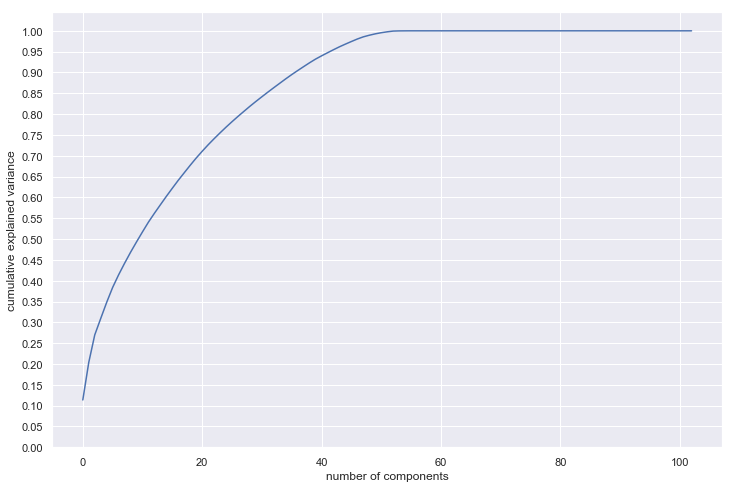

In [264]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0,1.05,0.05))
plt.show()

In [265]:
pca_final = IncrementalPCA(n_components=40)

In [266]:
telecom_train_pca = pca_final.fit_transform(X_train_scaled)
telecom_train_pca.shape

(43099, 40)

In [267]:
pc_columns = []
for x in range(1,41):
    pc_columns.append('PC'+str(x))

In [268]:
data_pc_df = pd.DataFrame((telecom_train_pca),columns = pc_columns)

In [269]:
data_pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-0.793940,-0.876104,-1.749342,-0.065318,-0.158434,-0.106197,-0.063036,0.212076,-0.193579,0.436954,-0.083534,-0.233281,-0.135139,0.327148,0.058324,-0.025962,-0.159973,-0.041053,-0.223114,-0.113464,0.296312,0.202753,-0.040319,-0.219314,0.137151,0.467708,0.097964,0.244554,-0.085848,-0.191050,-0.449015,-0.054980,-0.090776,-0.322424,-0.155166,0.099899,0.276805,-0.292036,-0.506856,-0.314650
1,1.794302,-1.110551,-3.715705,-0.002823,-1.095805,1.069475,-1.217863,-0.992489,0.295384,-0.066440,0.321300,-0.557242,-0.424352,1.412821,1.370743,-0.650581,0.583438,-0.246845,0.172957,-0.577996,0.377002,0.233284,0.510631,-0.080821,-0.298879,0.107010,-0.100241,0.049796,0.117021,-0.566205,-0.234032,-0.211158,-0.023533,0.156709,-0.391533,-0.088783,0.377581,-0.401893,-0.784737,-0.381181
2,-0.937672,-1.565856,-0.657619,-0.663316,0.411042,-0.132927,-0.695616,0.670769,-0.282244,0.055778,0.028126,-0.273565,-0.124470,0.484263,-0.525716,0.052718,-0.192140,0.168434,-0.253627,-0.343874,0.208902,-0.107790,-0.241719,-0.168181,0.040962,0.378632,0.189116,0.103964,-0.579323,0.348444,-1.089369,-0.427826,-0.171674,0.319169,0.157028,0.548195,-0.231701,0.403716,1.458017,0.144223
3,-3.162574,5.295578,-0.702406,0.814444,-1.278976,-0.820061,-1.704494,-0.225121,-0.105717,0.435820,-0.054856,0.220005,0.040932,-0.594679,-0.167787,-0.644557,-0.624062,0.166688,-0.964137,-0.383723,-0.727364,-0.153490,0.170890,-0.214441,-0.244223,0.441738,-0.071840,0.177199,0.150086,-0.417693,-0.125251,-0.237566,-0.297317,-0.525660,0.117061,-0.100851,0.168288,-0.337086,-0.274985,-0.106880
4,5.309483,2.695574,-7.498838,0.011228,-0.966518,2.438688,4.227204,3.109099,1.826013,0.144092,-1.408539,-2.156846,-2.254864,-4.071432,-1.290156,-1.478298,-0.333717,1.449204,-1.284732,-1.175180,0.185872,1.408217,-0.796850,0.072273,0.967532,-0.960470,0.371911,-0.857786,-0.430414,0.064600,0.860511,0.484431,-1.111949,-0.366876,0.736522,-0.015523,0.031330,0.303701,0.342259,0.181533


In [270]:
data_pc_df.shape

(43099, 40)

In [271]:
data_pc_df.index = X_train_scaled.index

## 4.3 Logistic regression with PCA

### model1

In [272]:
X_pca_lr_1 = sm.add_constant(data_pc_df)
pca_lm1 = sm.GLM(y_train,X_pca_lr_1,family = sm.families.Binomial())
pca_lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43058
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16537.
Date:                Mon, 19 Aug 2019   Deviance:                       33075.
Time:                        19:00:04   Pearson chi2:                 1.87e+06
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4179      0.019    -22.088      0.000      -0.455      -0.381
PC1           -0.7782      0.009    -87.981      0.000      -0.796      -0.761
PC2            0.2589      0.006     41.328      0.000       0.247       0.271
PC3           -0.2386      0.008    -28.757      0.000      -0.255      -0.222
PC4           -0.1419      0.012    -12.114      0.000      -0.165      -0.119
PC5            0.3313      0.012     27.278      0.000       0.307       0.355
PC6            0.2396      0.012     19.627      0.000       0.216       0.264
PC7            0.0836      0.011      7.733      0.000       0.062       0.105
PC8           -0.1965      0.012    -15.940      0.000      -0.221      -0.172
PC9           -0.1379      0.014     -9.968      0.000      -0.165      -0.111
PC10          -0.0455      0.014     -3.353      0.001      -0.072      -0.019
PC11           0.1363      0.015      9.146      0.000       0.107       0.166
PC12          -0.0511      0.011     -4.622      0.000      -0.073      -0.029
PC13          -0.0668      0.020     -3.399      0.001      -0.105      -0.028
PC14           0.0757      0.015      5.056      0.000       0.046       0.105
PC15          -0.0837      0.017     -5.044      0.000      -0.116      -0.051
PC16           0.1287      0.015      8.554      0.000       0.099       0.158
PC17           0.0138      0.014      0.963      0.336      -0.014       0.042
PC18           0.1784      0.022      8.088      0.000       0.135       0.222
PC19           0.0384      0.015      2.535      0.011       0.009       0.068
PC20           0.2069      0.015     13.493      0.000       0.177       0.237
PC21          -0.0861      0.022     -3.988      0.000      -0.128      -0.044
PC22           0.1370      0.019      7.149      0.000       0.099       0.175
PC23           0.0714      0.019      3.825      0.000       0.035       0.108
PC24           0.2990      0.024     12.349      0.000       0.252       0.347
PC25          -0.2213      0.021    -10.350      0.000      -0.263      -0.179
PC26          -0.2908      0.019    -15.399      0.000      -0.328      -0.254
PC27          -0.0385      0.020     -1.967      0.049      -0.077      -0.000
PC28          -0.0423      0.019     -2.188      0.029      -0.080      -0.004
PC29           0.0376      0.021      1.803      0.071      -0.003       0.079
PC30          -0.0088      0.021     -0.416      0.677      -0.050       0.033
PC31          -0.0973      0.020     -4.821      0.000      -0.137      -0.058
PC32          -0.0091      0.023     -0.389      0.697      -0.055       0.037
PC33          -0.0593      0.024     -2.520      0.012      -0.105      -0.013
PC34          -0.1210      0.025     -4.843      0.000      -0.170      -0.072
PC35           0.0513      0.026      1.982      0.047       0.001       0.102
PC36          -0.0798      0.016     -4.871      0.000      -0.112      -0.048
PC

We can see that some of the P values are greater than 0.05.Hence dropping those columns.

In [273]:
pca_data_df = data_pc_df.copy()

In [274]:
pca_data_df.drop('PC32',axis = 1,inplace = True)

### model2

In [275]:
X_pca_lr_2 = sm.add_constant(pca_data_df)
pca_lm2 = sm.GLM(y_train,X_pca_lr_2,family = sm.families.Binomial())
pca_lm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43059
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16538.
Date:                Mon, 19 Aug 2019   Deviance:                       33075.
Time:                        19:00:39   Pearson chi2:                 1.86e+06
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4182      0.019    -22.118      0.000      -0.455      -0.381
PC1           -0.7785      0.009    -88.197      0.000      -0.796      -0.761
PC2            0.2589      0.006     41.334      0.000       0.247       0.271
PC3           -0.2389      0.008    -28.887      0.000      -0.255      -0.223
PC4           -0.1417      0.012    -12.102      0.000      -0.165      -0.119
PC5            0.3310      0.012     27.296      0.000       0.307       0.355
PC6            0.2402      0.012     19.811      0.000       0.216       0.264
PC7            0.0836      0.011      7.733      0.000       0.062       0.105
PC8           -0.1965      0.012    -15.947      0.000      -0.221      -0.172
PC9           -0.1381      0.014     -9.984      0.000      -0.165      -0.111
PC10          -0.0453      0.014     -3.338      0.001      -0.072      -0.019
PC11           0.1373      0.015      9.341      0.000       0.109       0.166
PC12          -0.0517      0.011     -4.714      0.000      -0.073      -0.030
PC13          -0.0661      0.020     -3.377      0.001      -0.104      -0.028
PC14           0.0757      0.015      5.053      0.000       0.046       0.105
PC15          -0.0841      0.017     -5.073      0.000      -0.117      -0.052
PC16           0.1293      0.015      8.648      0.000       0.100       0.159
PC17           0.0147      0.014      1.037      0.300      -0.013       0.042
PC18           0.1798      0.022      8.242      0.000       0.137       0.223
PC19           0.0389      0.015      2.582      0.010       0.009       0.068
PC20           0.2063      0.015     13.541      0.000       0.176       0.236
PC21          -0.0853      0.021     -3.967      0.000      -0.127      -0.043
PC22           0.1386      0.019      7.412      0.000       0.102       0.175
PC23           0.0711      0.019      3.815      0.000       0.035       0.108
PC24           0.2963      0.023     12.756      0.000       0.251       0.342
PC25          -0.2232      0.021    -10.693      0.000      -0.264      -0.182
PC26          -0.2910      0.019    -15.429      0.000      -0.328      -0.254
PC27          -0.0392      0.020     -2.009      0.045      -0.077      -0.001
PC28          -0.0425      0.019     -2.201      0.028      -0.080      -0.005
PC29           0.0376      0.021      1.799      0.072      -0.003       0.079
PC30          -0.0093      0.021     -0.438      0.661      -0.051       0.032
PC31          -0.0983      0.020     -4.922      0.000      -0.138      -0.059
PC33          -0.0608      0.023     -2.620      0.009      -0.106      -0.015
PC34          -0.1218      0.025     -4.895      0.000      -0.171      -0.073
PC35           0.0506      0.026      1.957      0.050   -8.89e-05       0.101
PC36          -0.0799      0.016     -4.876      0.000      -0.112      -0.048
PC37           0.1165      0.028      4.208      0.000       0.062       0.171
PC

In [276]:
pca_data_df.drop('PC30',axis = 1,inplace = True)

### model 3

In [277]:
X_pca_lr_3 = sm.add_constant(pca_data_df)
pca_lm3 = sm.GLM(y_train,X_pca_lr_3,family = sm.families.Binomial())
pca_lm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43060
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16538.
Date:                Mon, 19 Aug 2019   Deviance:                       33075.
Time:                        19:01:00   Pearson chi2:                 1.89e+06
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4185      0.019    -22.145      0.000      -0.456      -0.381
PC1           -0.7786      0.009    -88.230      0.000      -0.796      -0.761
PC2            0.2588      0.006     41.359      0.000       0.247       0.271
PC3           -0.2390      0.008    -28.922      0.000      -0.255      -0.223
PC4           -0.1425      0.012    -12.288      0.000      -0.165      -0.120
PC5            0.3306      0.012     27.317      0.000       0.307       0.354
PC6            0.2403      0.012     19.811      0.000       0.217       0.264
PC7            0.0835      0.011      7.725      0.000       0.062       0.105
PC8           -0.1958      0.012    -16.030      0.000      -0.220      -0.172
PC9           -0.1376      0.014     -9.982      0.000      -0.165      -0.111
PC10          -0.0457      0.014     -3.372      0.001      -0.072      -0.019
PC11           0.1369      0.015      9.329      0.000       0.108       0.166
PC12          -0.0515      0.011     -4.702      0.000      -0.073      -0.030
PC13          -0.0664      0.020     -3.390      0.001      -0.105      -0.028
PC14           0.0749      0.015      5.030      0.000       0.046       0.104
PC15          -0.0842      0.017     -5.071      0.000      -0.117      -0.052
PC16           0.1287      0.015      8.639      0.000       0.099       0.158
PC17           0.0146      0.014      1.029      0.303      -0.013       0.042
PC18           0.1789      0.022      8.213      0.000       0.136       0.222
PC19           0.0384      0.015      2.554      0.011       0.009       0.068
PC20           0.2071      0.015     13.664      0.000       0.177       0.237
PC21          -0.0851      0.022     -3.951      0.000      -0.127      -0.043
PC22           0.1373      0.018      7.430      0.000       0.101       0.174
PC23           0.0718      0.019      3.867      0.000       0.035       0.108
PC24           0.2954      0.023     12.755      0.000       0.250       0.341
PC25          -0.2251      0.020    -11.016      0.000      -0.265      -0.185
PC26          -0.2905      0.019    -15.423      0.000      -0.327      -0.254
PC27          -0.0402      0.019     -2.069      0.039      -0.078      -0.002
PC28          -0.0415      0.019     -2.162      0.031      -0.079      -0.004
PC29           0.0390      0.021      1.884      0.060      -0.002       0.080
PC31          -0.0980      0.020     -4.905      0.000      -0.137      -0.059
PC33          -0.0604      0.023     -2.604      0.009      -0.106      -0.015
PC34          -0.1202      0.025     -4.884      0.000      -0.168      -0.072
PC35           0.0492      0.026      1.915      0.055      -0.001       0.099
PC36          -0.0799      0.016     -4.875      0.000      -0.112      -0.048
PC37           0.1168      0.028      4.221      0.000       0.063       0.171
PC38          -0.1456      0.024     -6.048      0.000      -0.193      -0.098
PC

In [278]:
pca_data_df.drop('PC17',axis = 1,inplace = True)

### model 4

In [279]:
X_pca_lr_4 = sm.add_constant(pca_data_df)
pca_lm4 = sm.GLM(y_train,X_pca_lr_4,family = sm.families.Binomial())
pca_lm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43061
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16538.
Date:                Mon, 19 Aug 2019   Deviance:                       33076.
Time:                        19:01:16   Pearson chi2:                 1.57e+06
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4167      0.019    -22.153      0.000      -0.454      -0.380
PC1           -0.7781      0.009    -88.305      0.000      -0.795      -0.761
PC2            0.2585      0.006     41.364      0.000       0.246       0.271
PC3           -0.2376      0.008    -29.254      0.000      -0.253      -0.222
PC4           -0.1414      0.012    -12.257      0.000      -0.164      -0.119
PC5            0.3308      0.012     27.332      0.000       0.307       0.354
PC6            0.2389      0.012     19.825      0.000       0.215       0.262
PC7            0.0829      0.011      7.681      0.000       0.062       0.104
PC8           -0.1952      0.012    -15.974      0.000      -0.219      -0.171
PC9           -0.1377      0.014     -9.987      0.000      -0.165      -0.111
PC10          -0.0438      0.013     -3.260      0.001      -0.070      -0.017
PC11           0.1369      0.015      9.361      0.000       0.108       0.166
PC12          -0.0493      0.011     -4.604      0.000      -0.070      -0.028
PC13          -0.0720      0.019     -3.822      0.000      -0.109      -0.035
PC14           0.0742      0.015      4.985      0.000       0.045       0.103
PC15          -0.0824      0.016     -5.007      0.000      -0.115      -0.050
PC16           0.1288      0.015      8.638      0.000       0.100       0.158
PC18           0.1755      0.021      8.176      0.000       0.133       0.218
PC19           0.0369      0.015      2.451      0.014       0.007       0.066
PC20           0.2079      0.015     13.729      0.000       0.178       0.238
PC21          -0.0812      0.021     -3.824      0.000      -0.123      -0.040
PC22           0.1378      0.018      7.469      0.000       0.102       0.174
PC23           0.0726      0.019      3.908      0.000       0.036       0.109
PC24           0.2946      0.023     12.739      0.000       0.249       0.340
PC25          -0.2234      0.020    -10.977      0.000      -0.263      -0.184
PC26          -0.2947      0.018    -15.987      0.000      -0.331      -0.259
PC27          -0.0359      0.019     -1.880      0.060      -0.073       0.002
PC28          -0.0395      0.019     -2.056      0.040      -0.077      -0.002
PC29           0.0394      0.021      1.909      0.056      -0.001       0.080
PC31          -0.0962      0.020     -4.833      0.000      -0.135      -0.057
PC33          -0.0618      0.023     -2.671      0.008      -0.107      -0.016
PC34          -0.1179      0.025     -4.795      0.000      -0.166      -0.070
PC35           0.0481      0.026      1.882      0.060      -0.002       0.098
PC36          -0.0809      0.016     -4.928      0.000      -0.113      -0.049
PC37           0.1172      0.028      4.251      0.000       0.063       0.171
PC38          -0.1466      0.024     -6.105      0.000      -0.194      -0.100
PC39          -0.1601      0.020     -7.866      0.000      -0.200      -0.120
PC

In [280]:
pca_data_df.drop('PC35',axis = 1,inplace = True)

### model 5

In [281]:
X_pca_lr_5 = sm.add_constant(pca_data_df)
pca_lm5 = sm.GLM(y_train,X_pca_lr_5,family = sm.families.Binomial())
pca_lm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43062
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16540.
Date:                Mon, 19 Aug 2019   Deviance:                       33080.
Time:                        19:02:54   Pearson chi2:                 2.60e+06
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4167      0.019    -22.138      0.000      -0.454      -0.380
PC1           -0.7781      0.009    -88.150      0.000      -0.795      -0.761
PC2            0.2586      0.006     41.345      0.000       0.246       0.271
PC3           -0.2380      0.008    -29.248      0.000      -0.254      -0.222
PC4           -0.1386      0.011    -12.160      0.000      -0.161      -0.116
PC5            0.3352      0.012     28.226      0.000       0.312       0.358
PC6            0.2361      0.012     19.738      0.000       0.213       0.260
PC7            0.0850      0.011      7.901      0.000       0.064       0.106
PC8           -0.1936      0.012    -15.842      0.000      -0.218      -0.170
PC9           -0.1399      0.014    -10.131      0.000      -0.167      -0.113
PC10          -0.0448      0.014     -3.316      0.001      -0.071      -0.018
PC11           0.1335      0.014      9.206      0.000       0.105       0.162
PC12          -0.0492      0.011     -4.524      0.000      -0.071      -0.028
PC13          -0.0687      0.019     -3.626      0.000      -0.106      -0.032
PC14           0.0709      0.015      4.787      0.000       0.042       0.100
PC15          -0.0823      0.016     -5.066      0.000      -0.114      -0.050
PC16           0.1238      0.015      8.416      0.000       0.095       0.153
PC18           0.1830      0.021      8.840      0.000       0.142       0.224
PC19           0.0345      0.015      2.291      0.022       0.005       0.064
PC20           0.2145      0.015     14.518      0.000       0.186       0.244
PC21          -0.0777      0.021     -3.669      0.000      -0.119      -0.036
PC22           0.1286      0.018      7.177      0.000       0.093       0.164
PC23           0.0749      0.019      4.031      0.000       0.038       0.111
PC24           0.2832      0.022     12.598      0.000       0.239       0.327
PC25          -0.2341      0.020    -11.841      0.000      -0.273      -0.195
PC26          -0.2945      0.019    -15.898      0.000      -0.331      -0.258
PC27          -0.0428      0.019     -2.285      0.022      -0.079      -0.006
PC28          -0.0421      0.019     -2.189      0.029      -0.080      -0.004
PC29           0.0341      0.020      1.713      0.087      -0.005       0.073
PC31          -0.0969      0.020     -4.871      0.000      -0.136      -0.058
PC33          -0.0618      0.023     -2.666      0.008      -0.107      -0.016
PC34          -0.1126      0.025     -4.589      0.000      -0.161      -0.064
PC36          -0.0770      0.016     -4.722      0.000      -0.109      -0.045
PC37           0.1335      0.026      5.091      0.000       0.082       0.185
PC38          -0.1367      0.024     -5.774      0.000      -0.183      -0.090
PC39          -0.1597      0.020     -7.794      0.000      -0.200      -0.120
PC40          -0.2136      0.024     -8.873      0.000      -0.261      -0.166
==

In [282]:
pca_data_df.drop('PC29',axis = 1,inplace = True)

### model 6

In [283]:
X_pca_lr_6 = sm.add_constant(pca_data_df)
pca_lm6 = sm.GLM(y_train,X_pca_lr_6,family = sm.families.Binomial())
pca_lm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43063
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16541.
Date:                Mon, 19 Aug 2019   Deviance:                       33083.
Time:                        19:03:16   Pearson chi2:                 2.36e+06
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4194      0.019    -22.360      0.000      -0.456      -0.383
PC1           -0.7787      0.009    -88.291      0.000      -0.796      -0.761
PC2            0.2590      0.006     41.447      0.000       0.247       0.271
PC3           -0.2380      0.008    -29.296      0.000      -0.254      -0.222
PC4           -0.1373      0.011    -12.166      0.000      -0.159      -0.115
PC5            0.3372      0.012     28.686      0.000       0.314       0.360
PC6            0.2362      0.012     19.767      0.000       0.213       0.260
PC7            0.0844      0.011      7.853      0.000       0.063       0.105
PC8           -0.1948      0.012    -15.974      0.000      -0.219      -0.171
PC9           -0.1412      0.014    -10.259      0.000      -0.168      -0.114
PC10          -0.0460      0.013     -3.429      0.001      -0.072      -0.020
PC11           0.1305      0.014      9.193      0.000       0.103       0.158
PC12          -0.0494      0.011     -4.561      0.000      -0.071      -0.028
PC13          -0.0671      0.019     -3.556      0.000      -0.104      -0.030
PC14           0.0740      0.015      5.041      0.000       0.045       0.103
PC15          -0.0780      0.016     -4.933      0.000      -0.109      -0.047
PC16           0.1220      0.015      8.328      0.000       0.093       0.151
PC18           0.1927      0.019     10.004      0.000       0.155       0.230
PC19           0.0328      0.015      2.202      0.028       0.004       0.062
PC20           0.2165      0.015     14.639      0.000       0.187       0.245
PC21          -0.0744      0.021     -3.547      0.000      -0.116      -0.033
PC22           0.1274      0.018      7.191      0.000       0.093       0.162
PC23           0.0756      0.018      4.089      0.000       0.039       0.112
PC24           0.2842      0.022     12.738      0.000       0.240       0.328
PC25          -0.2303      0.019    -11.884      0.000      -0.268      -0.192
PC26          -0.2958      0.018    -16.017      0.000      -0.332      -0.260
PC27          -0.0474      0.019     -2.550      0.011      -0.084      -0.011
PC28          -0.0437      0.019     -2.274      0.023      -0.081      -0.006
PC31          -0.0955      0.020     -4.819      0.000      -0.134      -0.057
PC33          -0.0683      0.023     -2.998      0.003      -0.113      -0.024
PC34          -0.1130      0.024     -4.628      0.000      -0.161      -0.065
PC36          -0.0787      0.016     -4.840      0.000      -0.111      -0.047
PC37           0.1292      0.026      4.941      0.000       0.078       0.180
PC38          -0.1385      0.024     -5.872      0.000      -0.185      -0.092
PC39          -0.1624      0.020     -7.967      0.000      -0.202      -0.122
PC40          -0.2129      0.024     -8.843      0.000      -0.260      -0.166
==============================================================================
""

all the p values in this model are less than 0.05 hence this is a stable model. VIF check is not needed because pca creates un correlated variables

### VIF

In [284]:
vif = pd.DataFrame()
vif['Features'] = X_pca_lr_6.columns
vif['VIF'] = [variance_inflation_factor(X_pca_lr_6.values, i) for i in range(X_pca_lr_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.0
1,PC1,1.0
20,PC21,1.0
21,PC22,1.0
22,PC23,1.0
23,PC24,1.0
24,PC25,1.0
25,PC26,1.0
26,PC27,1.0
27,PC28,1.0


In [285]:
y_train_pred = pca_lm6.fit().predict(X_pca_lr_6)

In [286]:
y_train_pred.head()

I12699    0.579792
I17582    0.258831
I27307    0.405962
I6081     0.935248
I19702    0.072489
dtype: float64

In [287]:
y_train.head()

I12699    0
I17582    0
I27307    0
I6081     1
I19702    0
dtype: int64

In [288]:
y_train_pred_final = y_train.reset_index().rename(columns = {0:'churn'})

In [289]:
y_train_pred_final = y_train_pred_final.merge(y_train_pred.reset_index().rename(columns = {0:'churn_prob'}),on = 'index')

In [290]:
y_train_pred_final.head()

,index,churn,churn_prob
0,I12699,0,0.579792
1,I17582,0,0.258831
2,I27307,0,0.405962
3,I6081,1,0.935248
4,I19702,0,0.072489


### ROC curve

In [291]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [292]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

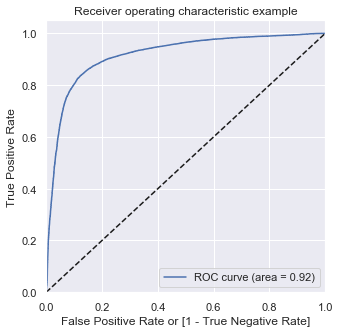

In [293]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

### optimal cutoff point

In [294]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,I12699,0,0.579792,1,1,1,1,1,1,0,0,0,0
1,I17582,0,0.258831,1,1,1,0,0,0,0,0,0,0
2,I27307,0,0.405962,1,1,1,1,1,0,0,0,0,0
3,I6081,1,0.935248,1,1,1,1,1,1,1,1,1,1
4,I19702,0,0.072489,1,0,0,0,0,0,0,0,0,0


In [295]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.499988  1.000000  0.000000  0.499988
0.1   0.1  0.704518  0.973549  0.435499  0.632965
0.2   0.2  0.766166  0.951135  0.581206  0.694285
0.3   0.3  0.807490  0.929974  0.685012  0.746981
0.4   0.4  0.836098  0.905564  0.766636  0.795094
0.5   0.5  0.852990  0.873219  0.832761  0.839258
0.6   0.6  0.856354  0.826071  0.886636  0.879322
0.7   0.7  0.840901  0.756787  0.925012  0.909842
0.8   0.8  0.778139  0.598543  0.957726  0.934029
0.9   0.9  0.655630  0.328136  0.983109  0.951042


<Figure size 720x360 with 0 Axes>

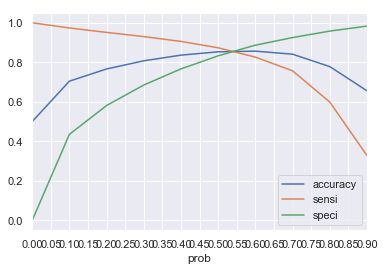

In [296]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (10,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,0.95,0.05))
plt.show()

#### From the curve above, 0.54 is the optimum point to take it as a cutoff probability.

In [297]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,I12699,0,0.579792,1,1,1,1,1,1,0,0,0,0,1
1,I17582,0,0.258831,1,1,1,0,0,0,0,0,0,0,0
2,I27307,0,0.405962,1,1,1,1,1,0,0,0,0,0,0
3,I6081,1,0.935248,1,1,1,1,1,1,1,1,1,1,1
4,I19702,0,0.072489,1,0,0,0,0,0,0,0,0,0,0


In [298]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.855866725446066

In [299]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[18442,  3108],
       [ 3104, 18445]])

In [300]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [301]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8559561928627779

In [302]:
# Let us calculate specificity
TN / float(TN+FP)

0.8557772621809745

In [303]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.14422273781902553


In [304]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8557973367976616


In [305]:
# Negative predictive value
print (TN / float(TN+ FN))

0.855936136637891


### test scores

In [306]:
telecom_test_pca = pca_final.transform(X_test_scaled)

test_pc_df = pd.DataFrame((telecom_test_pca),columns = pc_columns)

test_pc_df.index = X_test_scaled.index

In [307]:
test_pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
I40049,-2.777158,2.451414,-0.694848,0.303386,-0.707486,-0.682291,-1.837320,-0.678559,-0.172378,0.123634,-0.271947,0.074163,-0.335859,-0.803176,-0.529696,0.275127,-0.679525,0.331942,-0.694535,-0.210985,-0.759941,-0.481512,0.109021,-0.424637,0.029935,0.598935,-0.223867,0.470889,0.077620,-0.199382,-0.421722,-0.146711,-0.434831,-0.379549,0.162534,0.168578,-0.092091,-0.113454,0.433083,0.033215
I12138,-3.285801,5.037947,-1.829144,0.870465,-1.329991,-2.337150,1.135520,2.319736,1.320164,0.246256,0.405068,0.242169,-0.108745,1.287282,0.764980,-0.065290,0.246798,0.318275,0.522718,-0.388721,0.014681,0.261054,0.153481,0.230606,0.161531,0.157163,0.152456,-0.106429,0.143140,0.243640,-0.331798,-0.170317,-0.072207,0.174161,-0.308660,-0.042404,0.213352,-0.246055,-0.259524,-0.180414
I50555,-4.432980,18.456777,-4.136023,1.042673,-3.574738,-7.690386,9.008375,9.716002,3.060425,-0.253452,2.414965,1.658743,-0.858760,8.157037,3.237021,1.223846,0.727449,0.936797,0.128285,-1.133307,-1.170466,0.721053,-0.479608,0.686232,-0.435261,-0.987462,0.161015,-0.614673,-0.560805,1.829271,-0.522887,0.165619,1.668629,0.451996,-1.051444,0.234563,-0.341989,-0.164429,1.422182,-0.261129
I46310,-2.769673,-1.190737,0.016990,-0.062391,0.465791,-0.316008,0.813455,-1.134468,0.573736,-0.510081,0.872003,0.024270,0.026543,-0.558748,1.070323,-0.178330,0.201028,-0.091039,-0.006984,-0.043474,-0.140319,0.343356,0.200352,0.406229,-0.424056,-0.360610,-0.166333,0.036133,-0.097033,0.092955,-0.210404,0.034322,0.083657,-0.060174,0.059374,0.130626,0.002383,0.154715,0.380494,0.140871
I8763,1.020474,-2.312265,-0.043649,0.102328,0.062611,-0.792859,0.268079,-0.090031,-0.347259,0.236458,-0.110499,-0.484097,-0.228108,-0.147668,-0.274308,-0.457124,1.069875,0.153369,-0.430000,-0.189596,-0.604050,0.391131,0.090736,-0.304018,-0.373366,0.351572,-0.408894,-0.106288,-0.130278,0.548624,-0.787727,0.277018,-0.667181,0.458282,0.356339,-0.213819,0.102153,-0.170167,-0.747788,0.097071


In [308]:
X_test_pca_lr = sm.add_constant(test_pc_df[pca_data_df.columns.tolist()])

In [309]:
y_test_pred = pca_lm6.fit().predict(X_test_pca_lr)

In [310]:
y_test_pred.head()

I40049    0.858978
I12138    0.921359
I50555    0.994666
I46310    0.878498
I8763     0.153695
dtype: float64

In [311]:
y_test.head()

I40049    1
I12138    1
I50555    1
I46310    1
I8763     0
dtype: int64

In [312]:
y_test_pred_final = y_test.reset_index().rename(columns = {0:'churn'})

In [313]:
y_test_pred_final = y_test_pred_final.merge(y_test_pred.reset_index().rename(columns = {0:'churn_prob'}),on = 'index')

In [314]:
y_test_pred_final.head()

,index,churn,churn_prob
0,I40049,1,0.858978
1,I12138,1,0.921359
2,I50555,1,0.994666
3,I46310,1,0.878498
4,I8763,0,0.153695


In [315]:
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_prob.map( lambda x: 1 if x > 0.54 else 0)

y_test_pred_final.head()

,index,churn,churn_prob,final_predicted
0,I40049,1,0.858978,1
1,I12138,1,0.921359,1
2,I50555,1,0.994666,1
3,I46310,1,0.878498,1
4,I8763,0,0.153695,0


In [316]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.final_predicted)

0.854477958236659

In [317]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )
confusion2

array([[4609,  778],
       [ 790, 4598]])

In [318]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [319]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8533778767631774

In [320]:
# Let us calculate specificity
TN / float(TN+FP)

0.8555782439205495

In [321]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.14442175607945054


In [322]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8552827380952381


In [323]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8536766067790331


The train and test score are consistent therfore the model is not overfitting

## 4.4 Random forest with pca

In [324]:
rfc = RandomForestClassifier()
rfc.fit(data_pc_df,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [325]:
y_train_pred = rfc.predict(data_pc_df)

In [326]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

In [327]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21550
           1       1.00      1.00      1.00     21549

   micro avg       1.00      1.00      1.00     43099
   macro avg       1.00      1.00      1.00     43099
weighted avg       1.00      1.00      1.00     43099



In [328]:
# Printing confusion matrix
print(confusion_matrix(y_train,y_train_pred))

[[21507    43]
 [   76 21473]]


In [329]:
print(accuracy_score(y_train,y_train_pred))

0.9972389150560338


### test set

In [330]:
y_test_pred = rfc.predict(test_pc_df)

In [331]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5387
           1       0.93      0.93      0.93      5388

   micro avg       0.93      0.93      0.93     10775
   macro avg       0.93      0.93      0.93     10775
weighted avg       0.93      0.93      0.93     10775



In [332]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred))

[[5035  352]
 [ 370 5018]]


In [333]:
print(accuracy_score(y_test,y_test_pred))

0.9329930394431555


## Hyper parameter tuning

In [351]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,15,20],
    'n_estimators': [500,1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [352]:
# Fit the grid search to the data
grid_search.fit(data_pc_df,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [336]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8668646604329567 using {'max_depth': 20, 'min_samples_leaf': 100, 'n_estimators': 500}


In [353]:
rfc_final = RandomForestClassifier(n_estimators = 1000,max_depth = 20,bootstrap = True,random_state = 28)

In [354]:
rfc_final.fit(data_pc_df,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=28, verbose=0, warm_start=False)

In [355]:
y_train_pred = rfc_final.predict(data_pc_df)

In [356]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     21550
           1       0.99      1.00      0.99     21549

   micro avg       0.99      0.99      0.99     43099
   macro avg       0.99      0.99      0.99     43099
weighted avg       0.99      0.99      0.99     43099



In [357]:
# Printing confusion matrix
print(confusion_matrix(y_train,y_train_pred))

[[21259   291]
 [    0 21549]]


In [358]:
print(accuracy_score(y_train,y_train_pred))

0.9932481032042507


### test

In [359]:
y_test_pred = rfc_final.predict(test_pc_df)

In [360]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5387
           1       0.93      0.96      0.94      5388

   micro avg       0.94      0.94      0.94     10775
   macro avg       0.94      0.94      0.94     10775
weighted avg       0.94      0.94      0.94     10775



In [361]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_test_pred))

[[5001  386]
 [ 235 5153]]


In [362]:
print(accuracy_score(y_test,y_test_pred))

0.9423665893271461


## 4.5 Factors contributing to Churn

### Feature selection using RFE

In [363]:
lr_rfe = LogisticRegression()

In [364]:
rfe20 = RFE(lr_rfe, 20)             
rfe20 = rfe20.fit(X_train_scaled, y_train)

In [365]:
print('Selected columns from RFE:')
print(X_train_scaled.columns[rfe20.support_].tolist())

Selected columns from RFE:
['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'aon', 'total_rech_count_8', 'is_rech_7', 'is_rech_8', 'av_arpu_6_7', 'av_roam_ic_mou_6_7', 'av_std_og_t2t_mou_6_7', 'av_std_og_t2m_mou_6_7', 'diff_std_og_mou', 'diff_loc_ic_mou']


In [366]:
cols = X_train_scaled.columns[rfe20.support_].tolist()

In [367]:
cols

['onnet_mou_8',
 'offnet_mou_8',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2m_mou_8',
 'isd_og_mou_8',
 'loc_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'last_day_rch_amt_8',
 'aon',
 'total_rech_count_8',
 'is_rech_7',
 'is_rech_8',
 'av_arpu_6_7',
 'av_roam_ic_mou_6_7',
 'av_std_og_t2t_mou_6_7',
 'av_std_og_t2m_mou_6_7',
 'diff_std_og_mou',
 'diff_loc_ic_mou']

### Model creation with 20 features

In [368]:
X_model20 = sm.add_constant(X_train_scaled[cols])
logmodel20 = sm.GLM(y_train,X_model20,family = sm.families.Binomial())
logmodel20.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43078
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16436.
Date:                Mon, 19 Aug 2019   Deviance:                       32873.
Time:                        19:51:00   Pearson chi2:                 1.96e+06
No. Iterations:                     8   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4421      0.019    -23.471      0.000      -0.479      -0.405
onnet_mou_8              -0.8523      0.108     -7.908      0.000      -1.064      -0.641
offnet_mou_8             -1.6118      0.180     -8.952      0.000      -1.965      -1.259
roam_og_mou_8             0.5473      0.041     13.504      0.000       0.468       0.627
loc_og_t2m_mou_8         -0.3261      0.097     -3.359      0.001      -0.516      -0.136
std_og_t2m_mou_8          0.5951      0.133      4.483      0.000       0.335       0.855
isd_og_mou_8             -0.3521      0.053     -6.677      0.000      -0.455      -0.249
loc_ic_mou_8             -0.7777      0.070    -11.146      0.000      -0.914      -0.641
total_ic_mou_8           -0.6005      0.057    -10.506      0.000      -0.712      -0.488
spl_ic_mou_8             -0.5267      0.027    -19.177      0.000      -0.581      -0.473
last_day_rch_amt_8       -0.6632      0.023    -28.276      0.000      -0.709      -0.617
aon                      -0.3790      0.015    -24.549      0.000      -0.409      -0.349
total_rech_count_8       -0.3037      0.027    -11.079      0.000      -0.357      -0.250
is_rech_7                -0.3226      0.022    -14.962      0.000      -0.365      -0.280
is_rech_8                -0.3675      0.019    -19.469      0.000      -0.404      -0.330
av_arpu_6_7               0.6718      0.037     18.403      0.000       0.600       0.743
av_roam_ic_mou_6_7        0.2863      0.023     12.595      0.000       0.242       0.331
av_std_og_t2t_mou_6_7     0.6477      0.119      5.464      0.000       0.415       0.880
av_std_og_t2m_mou_6_7     0.6039      0.119      5.073      0.000       0.371       0.837
diff_std_og_mou          -0.6423      0.155     -4.153      0.000      -0.945      -0.339
diff_loc_ic_mou           0.3533      0.023     15.037      0.000       0.307       0.399
=========================================================================================
"""

In [369]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,96.33
4,std_og_t2m_mou_8,66.91
3,loc_og_t2m_mou_8,21.11
18,diff_std_og_mou,20.94
17,av_std_og_t2m_mou_6_7,13.94
16,av_std_og_t2t_mou_6_7,12.05
0,onnet_mou_8,8.51
6,loc_ic_mou_8,5.91
7,total_ic_mou_8,5.46
2,roam_og_mou_8,3.75


In [370]:
cols.remove('offnet_mou_8')

## Model with 19 features

In [371]:
X_model19 = sm.add_constant(X_train_scaled[cols])
logmodel19 = sm.GLM(y_train,X_model19,family = sm.families.Binomial())
logmodel19.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43079
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16479.
Date:                Mon, 19 Aug 2019   Deviance:                       32957.
Time:                        19:51:19   Pearson chi2:                 3.20e+06
No. Iterations:                     8   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4418      0.019    -23.424      0.000      -0.479      -0.405
onnet_mou_8              -0.4725      0.073     -6.516      0.000      -0.615      -0.330
roam_og_mou_8             0.2713      0.023     12.007      0.000       0.227       0.316
loc_og_t2m_mou_8         -1.0841      0.048    -22.616      0.000      -1.178      -0.990
std_og_t2m_mou_8         -0.4060      0.074     -5.462      0.000      -0.552      -0.260
isd_og_mou_8             -0.4851      0.049     -9.846      0.000      -0.582      -0.389
loc_ic_mou_8             -0.7982      0.070    -11.426      0.000      -0.935      -0.661
total_ic_mou_8           -0.6264      0.058    -10.850      0.000      -0.740      -0.513
spl_ic_mou_8             -0.5265      0.028    -19.143      0.000      -0.580      -0.473
last_day_rch_amt_8       -0.6540      0.024    -27.468      0.000      -0.701      -0.607
aon                      -0.3823      0.015    -24.787      0.000      -0.412      -0.352
total_rech_count_8       -0.3136      0.028    -11.345      0.000      -0.368      -0.259
is_rech_7                -0.3240      0.022    -15.046      0.000      -0.366      -0.282
is_rech_8                -0.3712      0.019    -19.664      0.000      -0.408      -0.334
av_arpu_6_7               0.6307      0.037     17.138      0.000       0.559       0.703
av_roam_ic_mou_6_7        0.2741      0.024     11.639      0.000       0.228       0.320
av_std_og_t2t_mou_6_7     0.2547      0.082      3.091      0.002       0.093       0.416
av_std_og_t2m_mou_6_7     0.2099      0.085      2.464      0.014       0.043       0.377
diff_std_og_mou          -0.1108      0.108     -1.029      0.303      -0.322       0.100
diff_loc_ic_mou           0.3586      0.023     15.641      0.000       0.314       0.403
=========================================================================================
"""

In [372]:
cols.remove('diff_std_og_mou')

## Model with 18 features

In [373]:
X_model18 = sm.add_constant(X_train_scaled[cols])
logmodel18 = sm.GLM(y_train,X_model18,family = sm.families.Binomial())
logmodel18.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43080
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16479.
Date:                Mon, 19 Aug 2019   Deviance:                       32958.
Time:                        19:51:30   Pearson chi2:                 3.04e+06
No. Iterations:                     8   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4407      0.019    -23.404      0.000      -0.478      -0.404
onnet_mou_8              -0.4028      0.024    -16.894      0.000      -0.450      -0.356
roam_og_mou_8             0.2607      0.020     13.111      0.000       0.222       0.300
loc_og_t2m_mou_8         -1.0893      0.048    -22.851      0.000      -1.183      -0.996
std_og_t2m_mou_8         -0.3339      0.025    -13.349      0.000      -0.383      -0.285
isd_og_mou_8             -0.4828      0.049     -9.846      0.000      -0.579      -0.387
loc_ic_mou_8             -0.8053      0.069    -11.596      0.000      -0.941      -0.669
total_ic_mou_8           -0.6241      0.058    -10.828      0.000      -0.737      -0.511
spl_ic_mou_8             -0.5262      0.027    -19.138      0.000      -0.580      -0.472
last_day_rch_amt_8       -0.6530      0.024    -27.479      0.000      -0.700      -0.606
aon                      -0.3823      0.015    -24.797      0.000      -0.413      -0.352
total_rech_count_8       -0.3134      0.028    -11.348      0.000      -0.368      -0.259
is_rech_7                -0.3240      0.022    -15.048      0.000      -0.366      -0.282
is_rech_8                -0.3714      0.019    -19.683      0.000      -0.408      -0.334
av_arpu_6_7               0.6277      0.037     17.141      0.000       0.556       0.699
av_roam_ic_mou_6_7        0.2753      0.023     11.739      0.000       0.229       0.321
av_std_og_t2t_mou_6_7     0.1748      0.026      6.658      0.000       0.123       0.226
av_std_og_t2m_mou_6_7     0.1265      0.026      4.801      0.000       0.075       0.178
diff_loc_ic_mou           0.3559      0.023     15.779      0.000       0.312       0.400
=========================================================================================
"""

In [374]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,5.83
6,total_ic_mou_8,5.44
13,av_arpu_6_7,2.48
16,av_std_og_t2m_mou_6_7,1.91
15,av_std_og_t2t_mou_6_7,1.83
0,onnet_mou_8,1.62
2,loc_og_t2m_mou_8,1.62
3,std_og_t2m_mou_8,1.61
4,isd_og_mou_8,1.54
12,is_rech_8,1.53


In [375]:
cols.remove('loc_ic_mou_8')

## Model with 17 features

In [376]:
X_model17 = sm.add_constant(X_train_scaled[cols])
logmodel17 = sm.GLM(y_train,X_model17,family = sm.families.Binomial())
logmodel17.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43081
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16542.
Date:                Mon, 19 Aug 2019   Deviance:                       33084.
Time:                        19:51:51   Pearson chi2:                 2.96e+06
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4170      0.019    -22.466      0.000      -0.453      -0.381
onnet_mou_8              -0.4095      0.024    -16.985      0.000      -0.457      -0.362
roam_og_mou_8             0.2652      0.020     13.281      0.000       0.226       0.304
loc_og_t2m_mou_8         -1.2555      0.047    -26.907      0.000      -1.347      -1.164
std_og_t2m_mou_8         -0.3182      0.025    -12.828      0.000      -0.367      -0.270
isd_og_mou_8             -0.4482      0.064     -7.033      0.000      -0.573      -0.323
total_ic_mou_8           -1.2062      0.038    -31.532      0.000      -1.281      -1.131
spl_ic_mou_8             -0.5249      0.027    -19.099      0.000      -0.579      -0.471
last_day_rch_amt_8       -0.6596      0.024    -27.507      0.000      -0.707      -0.613
aon                      -0.3953      0.015    -25.774      0.000      -0.425      -0.365
total_rech_count_8       -0.3117      0.028    -11.281      0.000      -0.366      -0.258
is_rech_7                -0.3244      0.021    -15.126      0.000      -0.366      -0.282
is_rech_8                -0.3723      0.019    -19.770      0.000      -0.409      -0.335
av_arpu_6_7               0.6329      0.036     17.398      0.000       0.562       0.704
av_roam_ic_mou_6_7        0.2964      0.024     12.241      0.000       0.249       0.344
av_std_og_t2t_mou_6_7     0.1829      0.026      6.932      0.000       0.131       0.235
av_std_og_t2m_mou_6_7     0.1309      0.026      4.957      0.000       0.079       0.183
diff_loc_ic_mou           0.3373      0.022     15.079      0.000       0.293       0.381
=========================================================================================
"""

In [377]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[cols].values, i) for i in range(X_train_scaled[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,av_arpu_6_7,2.48
15,av_std_og_t2m_mou_6_7,1.91
14,av_std_og_t2t_mou_6_7,1.83
0,onnet_mou_8,1.62
3,std_og_t2m_mou_8,1.60
2,loc_og_t2m_mou_8,1.53
4,isd_og_mou_8,1.53
5,total_ic_mou_8,1.52
11,is_rech_8,1.52
10,is_rech_7,1.43


All p values are less than 0.05 and all VIFs are less than 5. Therefore this is stable model.

In [378]:
y_train_pred = logmodel17.fit().predict(X_model17)

In [379]:
y_train_pred.head()

I12699    0.680022
I17582    0.249100
I27307    0.476482
I6081     0.935335
I19702    0.057168
dtype: float64

In [380]:
y_train_pred_final = y_train.reset_index().rename(columns = {0:'churn'})

In [381]:
y_train_pred_final = y_train_pred_final.merge(y_train_pred.reset_index().rename(columns = {0:'churn_prob'}),on = 'index')

In [382]:
y_train_pred_final.head()

,index,churn,churn_prob
0,I12699,0,0.680022
1,I17582,0,0.249100
2,I27307,0,0.476482
3,I6081,1,0.935335
4,I19702,0,0.057168


In [383]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_prob, drop_intermediate = False )

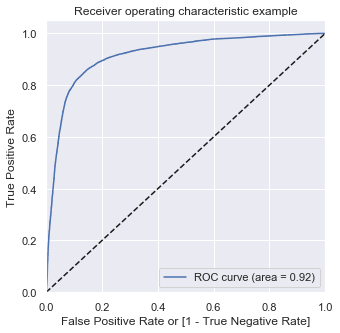

In [384]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_prob)

### optimal cutoff point

In [385]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,I12699,0,0.680022,1,1,1,1,1,1,1,0,0,0
1,I17582,0,0.249100,1,1,1,0,0,0,0,0,0,0
2,I27307,0,0.476482,1,1,1,1,1,0,0,0,0,0
3,I6081,1,0.935335,1,1,1,1,1,1,1,1,1,1
4,I19702,0,0.057168,1,0,0,0,0,0,0,0,0,0


In [386]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','prec'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,prec]
print(cutoff_df)

     prob  accuracy     sensi     speci      prec
0.0   0.0  0.499988  1.000000  0.000000  0.499988
0.1   0.1  0.705770  0.973177  0.438376  0.634063
0.2   0.2  0.767767  0.951320  0.584223  0.695859
0.3   0.3  0.809624  0.932990  0.686265  0.748344
0.4   0.4  0.837421  0.910297  0.764548  0.794492
0.5   0.5  0.853059  0.874751  0.831369  0.838374
0.6   0.6  0.856122  0.829690  0.882552  0.875992
0.7   0.7  0.843036  0.763144  0.922923  0.908262
0.8   0.8  0.771039  0.585828  0.956241  0.930493
0.9   0.9  0.649458  0.316534  0.982367  0.947230


<Figure size 720x360 with 0 Axes>

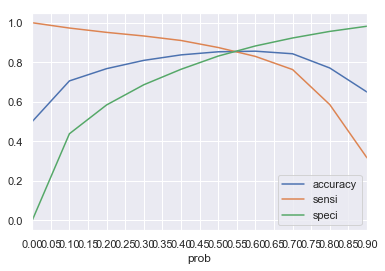

In [387]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (10,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,0.95,0.05))
plt.show()

#### From the curve above, 0.54 is the optimum point to take it as a cutoff probability.

In [388]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_pred_final.head()

,index,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,I12699,0,0.680022,1,1,1,1,1,1,1,0,0,0,1
1,I17582,0,0.249100,1,1,1,0,0,0,0,0,0,0,0
2,I27307,0,0.476482,1,1,1,1,1,0,0,0,0,0,0
3,I6081,1,0.935335,1,1,1,1,1,1,1,1,1,1,1
4,I19702,0,0.057168,1,0,0,0,0,0,0,0,0,0,0


In [389]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.8566092020696536

In [390]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[18392,  3158],
       [ 3022, 18527]])

In [391]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [392]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8597614738502947

In [393]:
# Let us calculate specificity
TN / float(TN+FP)

0.8534570765661252

In [394]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.1465429234338747


In [395]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8543693797555915


In [396]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8588773699448958


### test scores

In [397]:
y_test_pred = logmodel17.fit().predict(sm.add_constant(X_test_scaled[cols]))

In [398]:
y_test_pred.head()

I40049    0.846511
I12138    0.923308
I50555    0.993590
I46310    0.892686
I8763     0.079030
dtype: float64

In [399]:
y_test.head()

I40049    1
I12138    1
I50555    1
I46310    1
I8763     0
dtype: int64

In [400]:
y_test_pred_final = y_test.reset_index().rename(columns = {0:'churn'})

In [401]:
y_test_pred_final = y_test_pred_final.merge(y_test_pred.reset_index().rename(columns = {0:'churn_prob'}),on = 'index')

In [402]:
y_test_pred_final.head()

,index,churn,churn_prob
0,I40049,1,0.846511
1,I12138,1,0.923308
2,I50555,1,0.993590
3,I46310,1,0.892686
4,I8763,0,0.079030


In [403]:
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_prob.map( lambda x: 1 if x > 0.54 else 0)

y_test_pred_final.head()

,index,churn,churn_prob,final_predicted
0,I40049,1,0.846511,1
1,I12138,1,0.923308,1
2,I50555,1,0.993590,1
3,I46310,1,0.892686,1
4,I8763,0,0.079030,0


In [404]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.final_predicted)

0.8520649651972158

In [405]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )
confusion2

array([[4582,  805],
       [ 789, 4599]])

In [406]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [407]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8535634743875279

In [408]:
# Let us calculate specificity
TN / float(TN+FP)

0.85056617783553

In [409]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.14943382216447001


In [410]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8510362694300518


In [411]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8530999813814932


The train and test score are consistent therfore the model is not overfitting

## Final equation

In [412]:
print(logmodel17.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                43099
Model:                            GLM   Df Residuals:                    43081
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16542.
Date:                Mon, 19 Aug 2019   Deviance:                       33084.
Time:                        19:52:38   Pearson chi2:                 2.96e+06
No. Iterations:                     7   Covariance Type:             nonrobust
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4170      0.019    -22.466      0.000      -0.453      -0.381
onnet_mou_8        

__churn = -0.4170 - 0.4095\*`onnet_mou_8` + 0.2652\*`roam_og_mou_8` - 1.2555\*`loc_og_t2m_mou_8` - 0.3182\*`std_og_t2m_mou_8` - 0.4482\*`isd_og_mou_8` - 1.2062\*`total_ic_mou_8` - 0.5249\*`spl_ic_mou_8` - 0.6596\*`last_day_rch_amt_8` - 0.3953\*`aon` - 0.3117\*`total_rech_count_8` - 0.3244\*`is_rech_7` - 0.3723\*`is_rech_8` + 0.6329\*`av_arpu_6_7` + 0.2964\*`av_roam_ic_mou_6_7` + 0.1829\*`av_std_og_t2t_mou_6_7` + 0.1309\*`av_std_og_t2m_mou_6_7` + 0.3373\*`diff_loc_ic_mou`__

# Conclusions

- Random forest with PCA has better prediction capability than the logistic regression with accuracy of 0.94 and 0.95 sensitivity
- `loc_og_t2m_mou_8`,`total_ic_mou_8`,`last_day_rch_amt_8`,`spl_ic_mou_8`,`isd_og_mou_8` are effecting the churn negatively decreasing the probability of churn and `av_arpu_6_7`,`diff_loc_ic_mou`,`av_roam_ic_mou_6_7`,`roam_og_mou_8`,`av_std_og_t2t_mou_6_7` are effecting the churn positively, increasing the probability of churn.
- From this we can say that std and roam variables are causing the churn, which may mean that competition are offering better rates, which may be resulting in churn

# Recommendations

        -Lower the roaming charges as this is one of the reasons for pre-paid customers to seek out local operators when on roaming.
        -Customized pre-paid plan offers can be issued: For example customized plans based on where customer minutes of usage are higher - for instance outgoing/std/t2t/t2m etc .  
        -For customers who are staying longer with network we can increase customer loyalty points and offer some special discounts.  